# Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import re
from nltk.corpus import stopwords

# Primary analysis of data

In [6]:
df = pd.read_csv('Tabs_reviews.csv')
df.head()

,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts
0,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,"4.5★21,349 Ratings &845 Reviews","Dipti HatikakotiCertified Buyer, JorhatJan, 20...","4, 5, 5, 5, 5, 5, 5, 5, 5, 5","Very Good, Just wow!, Brilliant, Perfect produ...",Best tablet under budget 😊Review after 3 days....
1,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,"4.5★21,349 Ratings &845 Reviews","Vinod kumar PandeyCertified Buyer, Shrawasti ...","5, 4, 4, 4, 4, 5, 5, 4, 4, 4","Perfect product!, Very Good, Delightful, Wonde...","Nice performance no lag issue .....READ MORE, ..."
2,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,"4.4★2,979 Ratings &259 Reviews","Hemendra PalCertified Buyer, Janjgir4 months a...","5, 5, 4, 4, 3, 5, 5, 5, 4, 5","Brilliant, Worth every penny, Wonderful, Worth...","Super budget Pad for daily use....READ MORE, I..."
3,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,"4.4★2,979 Ratings &259 Reviews","Kiran HarapaleCertified Buyer, Bagalkot Distri...","5, 4, 5, 5, 5, 5, 4, 5, 5, 4","Perfect product!, Nice product, Excellent, Jus...","Nice pad😊✨READ MORE, Very nice productREAD MOR..."
4,https://www.flipkart.com/oneplus-pad-go-8-gb-r...,OnePlus Pad Go 8 GB RAM 128 GB ROM 11.35 inch ...,"4.5★13,869 Ratings &901 Reviews","Flipkart CustomerCertified Buyer, CuttackNov, ...","5, 5, 5, 5, 5, 5, 5, 5, 4, 5","Awesome, Mind-blowing purchase, Terrific purch...","Nice product at this price range 😍READ MORE, G..."


In [7]:
df.shape

(101, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Product URL                  101 non-null    object
 1   Title                        101 non-null    object
 2   Number of Ratings & Reviews  101 non-null    object
 3   Authors                      101 non-null    object
 4   Ratings                      100 non-null    object
 5   Review Titles                101 non-null    object
 6   Review Texts                 101 non-null    object
dtypes: object(7)
memory usage: 5.7+ KB


In [9]:
df.describe()

,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts
count,101,101,101,101,100,101,101
unique,100,53,47,89,71,89,89
top,https://www.flipkart.com/xiaomi-pad-6-8-gb-ram...,Xiaomi Pad 6 8 GB RAM 256 GB ROM 11.0 inch wit...,"4.5★21,349 Ratings &845 Reviews","Dipti HatikakotiCertified Buyer, JorhatJan, 20...","5, 5, 5, 5, 5, 5, 5, 5, 5, 5","Very Good, Just wow!, Brilliant, Perfect produ...",Best tablet under budget 😊Review after 3 days....
freq,2,3,4,2,16,2,2


In [10]:
df.isnull().sum()

Product URL                    0
Title                          0
Number of Ratings & Reviews    0
Authors                        0
Ratings                        1
Review Titles                  0
Review Texts                   0
dtype: int64

In [11]:
df.columns

Index(['Product URL', 'Title', 'Number of Ratings & Reviews', 'Authors',
       'Ratings', 'Review Titles', 'Review Texts'],
      dtype='object')

In [12]:
df.dtypes

Product URL                    object
Title                          object
Number of Ratings & Reviews    object
Authors                        object
Ratings                        object
Review Titles                  object
Review Texts                   object
dtype: object

# Description about the dataset

## Flipkart Tabs Reviews Dataset - Column Descriptions

## 1. Product URL  
- Contains the web link (URL) of the product's page on Flipkart of Laptops.  
- Helps in identifying the exact product being reviewed and allows direct navigation to the product page.  
- **Format:** A string in the form of a hyperlink (e.g., `https://www.flipkart.com/samsung-galaxy-tab-a9-8-gb-ram-128-rom-11-0-inch-wi-fi-5g-tablet-graphite/product-reviews/itm3b83242b6ce5a?pid=TABGTF4G3RPUDTVQ&lid=LSTTABGTF4G3RPUDTVQLWSBOL&marketplace=FLIPKART`).  

## 2. Title  
- Represents the name of the product being reviewed.  
- Includes details like the brand, model, color, and storage capacity.  
- **Example:** `"SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11.0 inch with Wi-Fi+5G Tablet (Graphite) Reviews"`  
- Important for distinguishing between product variants.

## 3. Number of Ratings & Reviews  
- Stores the total number of ratings and reviews submitted by customers.  
- Provides insight into the product’s popularity.  
- **Format:** `"4.5‚òÖ21,349 Ratings &845 Reviews"` or separate fields for ratings and reviews.  

## 4. Authors  
- Contains the names or usernames of customers who left a review.  
- **Example:** `"Dipti HatikakotiCertified Buyer, JorhatJan, 2024373106PermalinkReport Abuse, Piyush Singh  RajputCertified Buyer, Patna10 months ago28485PermalinkReport Abuse, Kunal  KumarCertified Buyer, Jehanabad District10 months ago5812"`.  
- Helps in tracking reviews from different users and analyzing their feedback.  

## 5. Ratings  
- Represents the star rating given by a reviewer, typically on a scale of 1 to 5.  
- **Format:** Numeric (integer or float), e.g., `1`, `3.5`, `5`.  
- Indicates the user’s overall satisfaction with the product.  

## 6. Review Title  
- A short summary or headline of the review provided by the user.  
- **Example:** `"Very Good, Just wow!, Brilliant, Perfect product!, Highly recommended, Highly recommended, Awesome, Worth every penny, Highly recommended, Super!"`  
- Useful for quickly understanding the essence of the review.  

## 7. Review Texts  
- Contains the full-text review written by the user.  
- Provides detailed feedback about the product, including pros and cons.  
- **Example:** `"Best tablet under budget üòäReview after 3 days.Display 4/5Battery 5/5Camera 3/5Performance 4/5I brought 4/64 gb varient (No lag issue)READ MORE"`  
- Critical for sentiment analysis and deeper customer insights.  


# Data Cleaning

### Assigning unique id for every product 

In [17]:
df['Product_ID'] = pd.Categorical(df['Title']).codes + 1
df.insert(0, 'Product_ID', df.pop('Product_ID'))
df.head()

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts
0,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,"4.5★21,349 Ratings &845 Reviews","Dipti HatikakotiCertified Buyer, JorhatJan, 20...","4, 5, 5, 5, 5, 5, 5, 5, 5, 5","Very Good, Just wow!, Brilliant, Perfect produ...",Best tablet under budget 😊Review after 3 days....
1,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,"4.5★21,349 Ratings &845 Reviews","Vinod kumar PandeyCertified Buyer, Shrawasti ...","5, 4, 4, 4, 4, 5, 5, 4, 4, 4","Perfect product!, Very Good, Delightful, Wonde...","Nice performance no lag issue .....READ MORE, ..."
2,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,"4.4★2,979 Ratings &259 Reviews","Hemendra PalCertified Buyer, Janjgir4 months a...","5, 5, 4, 4, 3, 5, 5, 5, 4, 5","Brilliant, Worth every penny, Wonderful, Worth...","Super budget Pad for daily use....READ MORE, I..."
3,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,"4.4★2,979 Ratings &259 Reviews","Kiran HarapaleCertified Buyer, Bagalkot Distri...","5, 4, 5, 5, 5, 5, 4, 5, 5, 4","Perfect product!, Nice product, Excellent, Jus...","Nice pad😊✨READ MORE, Very nice productREAD MOR..."
4,30,https://www.flipkart.com/oneplus-pad-go-8-gb-r...,OnePlus Pad Go 8 GB RAM 128 GB ROM 11.35 inch ...,"4.5★13,869 Ratings &901 Reviews","Flipkart CustomerCertified Buyer, CuttackNov, ...","5, 5, 5, 5, 5, 5, 5, 5, 4, 5","Awesome, Mind-blowing purchase, Terrific purch...","Nice product at this price range 😍READ MORE, G..."


In [18]:
df['Product_ID'].unique()

array([39, 50, 30, 32, 31, 17, 24,  6, 46, 27, 43, 21, 49, 28, 37, 33, 48,
        1, 36, 26,  7, 35, 51, 22, 53, 20, 34, 42,  8, 29, 40,  4, 25, 18,
       52, 23,  3, 16, 44, 41,  2, 19, 47, 14,  5,  9, 11, 15, 38, 10, 12,
       45, 13], dtype=int8)

In [19]:
# total no of tabs considered
df['Product_ID'].max()

53

In [20]:
# Changing the datatype of the column 
df['Number of Ratings & Reviews'] = df['Number of Ratings & Reviews'].astype(str)

In [21]:
df['Overall_Rating'] = df['Number of Ratings & Reviews'].str.extract(r"^(\d+\.\d+)")

### Extracting 'Overall_Rating', 'No_of_Ratings', 'No_of_Reviews' from 'Number of Ratings & Reviews' column

In [23]:
df['Number of Ratings & Reviews'] = df['Number of Ratings & Reviews'].str.replace(',', '')
df[['Overall_Rating', 'No_of_Ratings', 'No_of_Reviews']] = df['Number of Ratings & Reviews'].str.extract(r'(\d+\.\d+)★(\d+)[^\d]+(\d+)')

In [24]:
df.head()

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts,Overall_Rating,No_of_Ratings,No_of_Reviews
0,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,4.5★21349 Ratings &845 Reviews,"Dipti HatikakotiCertified Buyer, JorhatJan, 20...","4, 5, 5, 5, 5, 5, 5, 5, 5, 5","Very Good, Just wow!, Brilliant, Perfect produ...",Best tablet under budget 😊Review after 3 days....,4.5,21349,845
1,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,4.5★21349 Ratings &845 Reviews,"Vinod kumar PandeyCertified Buyer, Shrawasti ...","5, 4, 4, 4, 4, 5, 5, 4, 4, 4","Perfect product!, Very Good, Delightful, Wonde...","Nice performance no lag issue .....READ MORE, ...",4.5,21349,845
2,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,4.4★2979 Ratings &259 Reviews,"Hemendra PalCertified Buyer, Janjgir4 months a...","5, 5, 4, 4, 3, 5, 5, 5, 4, 5","Brilliant, Worth every penny, Wonderful, Worth...","Super budget Pad for daily use....READ MORE, I...",4.4,2979,259
3,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,4.4★2979 Ratings &259 Reviews,"Kiran HarapaleCertified Buyer, Bagalkot Distri...","5, 4, 5, 5, 5, 5, 4, 5, 5, 4","Perfect product!, Nice product, Excellent, Jus...","Nice pad😊✨READ MORE, Very nice productREAD MOR...",4.4,2979,259
4,30,https://www.flipkart.com/oneplus-pad-go-8-gb-r...,OnePlus Pad Go 8 GB RAM 128 GB ROM 11.35 inch ...,4.5★13869 Ratings &901 Reviews,"Flipkart CustomerCertified Buyer, CuttackNov, ...","5, 5, 5, 5, 5, 5, 5, 5, 4, 5","Awesome, Mind-blowing purchase, Terrific purch...","Nice product at this price range 😍READ MORE, G...",4.5,13869,901


In [25]:
# checking for null values 
df.isnull().sum()

Product_ID                     0
Product URL                    0
Title                          0
Number of Ratings & Reviews    0
Authors                        0
Ratings                        1
Review Titles                  0
Review Texts                   0
Overall_Rating                 1
No_of_Ratings                  1
No_of_Reviews                  1
dtype: int64

In [26]:
# Extracting 'Brand' from 'Title' column
df['Brand'] = df['Title'].str.extract(r'(^\w+)')
df['Brand'] = df['Brand'].str.strip()

In [27]:
df.head()

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts,Overall_Rating,No_of_Ratings,No_of_Reviews,Brand
0,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,4.5★21349 Ratings &845 Reviews,"Dipti HatikakotiCertified Buyer, JorhatJan, 20...","4, 5, 5, 5, 5, 5, 5, 5, 5, 5","Very Good, Just wow!, Brilliant, Perfect produ...",Best tablet under budget 😊Review after 3 days....,4.5,21349,845,SAMSUNG
1,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,4.5★21349 Ratings &845 Reviews,"Vinod kumar PandeyCertified Buyer, Shrawasti ...","5, 4, 4, 4, 4, 5, 5, 4, 4, 4","Perfect product!, Very Good, Delightful, Wonde...","Nice performance no lag issue .....READ MORE, ...",4.5,21349,845,SAMSUNG
2,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,4.4★2979 Ratings &259 Reviews,"Hemendra PalCertified Buyer, Janjgir4 months a...","5, 5, 4, 4, 3, 5, 5, 5, 4, 5","Brilliant, Worth every penny, Wonderful, Worth...","Super budget Pad for daily use....READ MORE, I...",4.4,2979,259,realme
3,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,4.4★2979 Ratings &259 Reviews,"Kiran HarapaleCertified Buyer, Bagalkot Distri...","5, 4, 5, 5, 5, 5, 4, 5, 5, 4","Perfect product!, Nice product, Excellent, Jus...","Nice pad😊✨READ MORE, Very nice productREAD MOR...",4.4,2979,259,realme
4,30,https://www.flipkart.com/oneplus-pad-go-8-gb-r...,OnePlus Pad Go 8 GB RAM 128 GB ROM 11.35 inch ...,4.5★13869 Ratings &901 Reviews,"Flipkart CustomerCertified Buyer, CuttackNov, ...","5, 5, 5, 5, 5, 5, 5, 5, 4, 5","Awesome, Mind-blowing purchase, Terrific purch...","Nice product at this price range 😍READ MORE, G...",4.5,13869,901,OnePlus


In [28]:
# Model
df['Model'] = df.apply(
    lambda x: x['Title'].split('(')[1].split(')')[0] if x['Brand'] == 'Apple'
    else pd.Series(x['Title']).str.extract(r'^\w+\s+([\w\s\+]+?)\s+\d+\s+GB')[0],
    axis=1
)

In [29]:
#Specifications
df['Specifications'] = df.apply(
    lambda x: ' '.join(x['Title'].split(')')[1].split()[:6]) if x['Brand'] == 'Apple'
    else pd.Series(x['Title']).str.extract(r'(\d+\s+GB\s+RAM\s+\d+\s+GB\s+ROM\s+[\d\.]+\s+inch)')[0],
    axis=1
)

In [30]:
# Wi-Fi type
df['WiFi_Type'] = df.apply(
    lambda x: ' '.join(x['Title'].split(')')[1].split()[6:8]) if x['Brand'] == 'Apple' and ')' in x['Title']
    else None,
    axis=1
)

mask_non_apple = df['Brand'] != 'Apple'
df.loc[mask_non_apple, 'WiFi_Type'] = df.loc[mask_non_apple, 'Title'].str.extract(r'(Wi-Fi\+?\s?[\w\d\+]+|Wi-Fi Only)')[0]

df['WiFi_Type'] = df['WiFi_Type'].str.strip().fillna('4G Tablet')

# color
df['Color'] = df['Title'].str.extract(r'\(([^)]+)\)\s+Reviews')

In [31]:
# Function for calculating 'average ratings' from 'Ratings' column
def calculate_mean(ratings):
    if isinstance(ratings, str):
        values = list(map(int, ratings.split(',')))
        return round(sum(values) / len(values), 1)
    return None 

df['Average Rating'] = df['Ratings'].apply(calculate_mean)
df['Average Rating'] = df['Average Rating'].fillna(df['Average Rating'].mean())
df['Average Rating'] = round(df['Average Rating'], 2)

In [32]:
df.isnull().sum()

Product_ID                      0
Product URL                     0
Title                           0
Number of Ratings & Reviews     0
Authors                         0
Ratings                         1
Review Titles                   0
Review Texts                    0
Overall_Rating                  1
No_of_Ratings                   1
No_of_Reviews                   1
Brand                           0
Model                           4
Specifications                 12
WiFi_Type                       0
Color                           1
Average Rating                  0
dtype: int64

### Handling null values

In [34]:
# Finding the null values of 'Overall_Rating' column
df.loc[df['Overall_Rating'].isnull()==True]

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts,Overall_Rating,No_of_Ratings,No_of_Reviews,Brand,Model,Specifications,WiFi_Type,Color,Average Rating
32,48,https://www.flipkart.com/itel-pad-one-4-gb-ram...,itel Pad One 4 GB RAM 128 GB ROM 10.1 inch wit...,4★85 Ratings &7 Reviews,"PRINCE MOHANCertified Buyer, BarmerJul, 202391...","5, 3, 5, 4, 5, 5, 5","Great product, Decent product, Excellent, Deli...","Nice tabletREAD MORE, Over all good but Redmi ...",NaN,NaN,NaN,itel,Pad One,4 GB RAM 128 GB ROM 10.1 inch,4G Tablet,Light Blue,4.6


In [35]:
# Handling null values in Overall_Rating column
df['Overall_Rating'] = df['Overall_Rating'].fillna(0)
df['No_of_Ratings'] = df['No_of_Ratings'].fillna(0)
df['No_of_Reviews'] = df['No_of_Reviews'].fillna(0)

In [36]:
# Finding the null values of 'Overall_Rating' column
df.loc[df['Color'].isnull()==True]

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts,Overall_Rating,No_of_Ratings,No_of_Reviews,Brand,Model,Specifications,WiFi_Type,Color,Average Rating
84,5,https://www.flipkart.com/apple-2024-ipad-pro-m...,Apple 2024 iPad Pro (M4) 2 TB ROM 11.0 Inch wi...,4.6★79 Ratings &6 Reviews,"Flipkart CustomerCertified Buyer, Pune5 months...","5, 5, 5, 5, 5, 4","Must buy!, Highly recommended, Terrific purcha...",Awesome!very thin body n smooth performance a...,4.6,79,6,Apple,M4,2 TB ROM 11.0 Inch with,Wi-Fi Only,NaN,4.8


In [37]:
df.loc[84, 'Title']

'Apple 2024 iPad Pro (M4) 2 TB ROM 11.0 Inch with Wi-Fi Only (Space Black (Nano-texture)) Reviews'

In [38]:
# Mapping according to the title the color column, filling the color column
color_map = {5: 'Space Black'}
df['Color'] = df.apply(lambda row: color_map[row['Product_ID']] if pd.isnull(row['Color']) else row['Color'], axis=1)

In [39]:
df.loc[df['Model']=='2019']

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts,Overall_Rating,No_of_Ratings,No_of_Reviews,Brand,Model,Specifications,WiFi_Type,Color,Average Rating
82,14,https://www.flipkart.com/apple-ipad-mini-2019-...,Apple ipad Mini (2019) 64 GB ROM 7.9 inch with...,4.6★5590 Ratings &798 Reviews,"Flipkart CustomerCertified Buyer, HosurSep, 20...","5, 5, 5, 5, 5, 5, 5, 5, 5, 5","Simply awesome, Best in the market!, Terrific ...","Best for pubg and streaming gamesREAD MORE, I ...",4.6,5590,798,Apple,2019,64 GB ROM 7.9 inch with,4G (Silver,Silver,5.0
83,14,https://www.flipkart.com/apple-ipad-mini-2019-...,Apple ipad Mini (2019) 64 GB ROM 7.9 inch with...,4.6★5590 Ratings &798 Reviews,"Krishna KumarCertified Buyer, GhaziabadMar, 20...","5, 5, 5, 5, 5, 5, 5, 5, 5, 5","Wonderful, Just wow!, Super!, Terrific, Don't ...","Very good product iPadREAD MORE, The product w...",4.6,5590,798,Apple,2019,64 GB ROM 7.9 inch with,4G (Silver,Silver,5.0
99,13,https://www.flipkart.com/apple-ipad-mini-2019-...,Apple ipad Mini (2019) 256 GB ROM 7.9 inch wit...,4.6★5590 Ratings &798 Reviews,"Flipkart CustomerCertified Buyer, HosurSep, 20...","5, 5, 5, 5, 5, 5, 5, 5, 5, 5","Simply awesome, Best in the market!, Terrific ...","Best for pubg and streaming gamesREAD MORE, I ...",4.6,5590,798,Apple,2019,256 GB ROM 7.9 inch with,Wi-Fi Only,Space Grey,5.0
100,13,https://www.flipkart.com/apple-ipad-mini-2019-...,Apple ipad Mini (2019) 256 GB ROM 7.9 inch wit...,4.6★5590 Ratings &798 Reviews,"Krishna KumarCertified Buyer, GhaziabadMar, 20...","5, 5, 5, 5, 5, 5, 5, 5, 5, 5","Wonderful, Just wow!, Super!, Terrific, Don't ...","Very good product iPadREAD MORE, The product w...",4.6,5590,798,Apple,2019,256 GB ROM 7.9 inch with,Wi-Fi Only,Space Grey,5.0


In [40]:
print(df.loc[82, 'Title'])
print(df.loc[99, 'Title'])

Apple ipad Mini (2019) 64 GB ROM 7.9 inch with 4G (Silver) Reviews
Apple ipad Mini (2019) 256 GB ROM 7.9 inch with Wi-Fi Only (Space Grey) Reviews


In [41]:
# Filling the null values of Model column from title mapping 
apple_map = {13: 'ipad Mini (2019)', 14: 'ipad Mini (2019)'}
df['Model'] = df.apply(lambda row: apple_map.get(row['Product_ID'], row['Model']), axis=1)

In [42]:
df.loc[df['Model']=='2019']

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts,Overall_Rating,No_of_Ratings,No_of_Reviews,Brand,Model,Specifications,WiFi_Type,Color,Average Rating


In [43]:
# Handling mistaken WiFi_Type information from title column
df.loc[df['WiFi_Type']=='11 inch']

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts,Overall_Rating,No_of_Ratings,No_of_Reviews,Brand,Model,Specifications,WiFi_Type,Color,Average Rating
87,11,https://www.flipkart.com/apple-ipad-pro-2020-2...,Apple iPad Pro 2020 (2nd Generation) 6 GB RAM ...,4.7★839 Ratings &85 Reviews,"Akash KumarCertified Buyer, SaharsaMar, 202118...","5, 5, 5, 5, 5, 5, 5, 5, 5, 4","Classy product, Worth every penny, Highly reco...",Mind Blowing Product . If your budget allows g...,4.7,839,85,Apple,2nd Generation,6 GB RAM 1 TB ROM,11 inch,Space Grey,4.9
88,11,https://www.flipkart.com/apple-ipad-pro-2020-2...,Apple iPad Pro 2020 (2nd Generation) 6 GB RAM ...,4.7★839 Ratings &85 Reviews,"HIMANSHU SHEKHAR GAURAVCertified Buyer, Deogha...","5, 5, 5","Terrific purchase, Slightly disappointed, Wort...","Happy to have itREAD MORE, Not good for prolon...",4.7,839,85,Apple,2nd Generation,6 GB RAM 1 TB ROM,11 inch,Space Grey,5.0


In [44]:
print(df.loc[87, 'Title'])

Apple iPad Pro 2020 (2nd Generation) 6 GB RAM 1 TB ROM 11 inch with 4G (Space Grey) Reviews


In [45]:
# Filling the mistaken values with correct values
apple_map = {11: '4G'}
df['WiFi_Type'] = df.apply(lambda row: apple_map.get(row['Product_ID'], row['WiFi_Type']), axis=1)

In [46]:
df.loc[df['Model'].isnull()==True]

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts,Overall_Rating,No_of_Ratings,No_of_Reviews,Brand,Model,Specifications,WiFi_Type,Color,Average Rating
66,23,https://www.flipkart.com/lenovo-tab-m10-plus-3...,Lenovo Tab M10 Plus (3rd Gen) 6 GB RAM 128 GB ...,4.2★588 Ratings &41 Reviews,"Sukanta DasCertified Buyer, Uttar Dinajpur Di...","4, 5, 5, 4, 5, 4, 4, 3, 5","Wonderful, Super!, Awesome, Really Nice, Brill...","Good and niceREAD MORE, Best Tablet ever I had...",4.2,588,41,Lenovo,NaN,6 GB RAM 128 GB ROM 10.61 inch,Wi-Fi Only,Storm Grey,4.30
67,23,https://www.flipkart.com/lenovo-tab-m10-plus-3...,Lenovo Tab M10 Plus (3rd Gen) 6 GB RAM 128 GB ...,4.2★588 Ratings &41 Reviews,"Shree RaoCertified Buyer, Ranga Reddy8 months ...","5, 5, 4, 5, 4","Don't waste your money, Awesome, Must buy!, Wo...",Expecting android pc.I have not even used web ...,4.2,588,41,Lenovo,NaN,6 GB RAM 128 GB ROM 10.61 inch,Wi-Fi Only,Storm Grey,4.60
78,19,https://www.flipkart.com/lenovo-m8-fhd-2nd-gen...,Lenovo M8 FHD (2nd Gen) 3 GB RAM 32 GB ROM 8 i...,3.8★217 Ratings &15 Reviews,"Flipkart CustomerCertified Buyer, ThrissurJul,...","5, 4, 4, 5, 5, 5, 5, 5, 5","Wonderful, Delightful, Pretty good, Awesome, S...","NiceREAD MORE, Very nice.camera quality is ver...",3.8,217,15,Lenovo,NaN,3 GB RAM 32 GB ROM 8 inch,Wi-Fi Only,Platinum Grey,4.80
79,19,https://www.flipkart.com/lenovo-m8-fhd-2nd-gen...,Lenovo M8 FHD (2nd Gen) 3 GB RAM 32 GB ROM 8 i...,3.8★217 Ratings &15 Reviews,"Karuppasamy MarimuthuCertified Buyer, Virudhu...",NaN,"Don't waste your money, Expected a better prod...","Very badREAD MORE, Verry slow speedAfter we ha...",3.8,217,15,Lenovo,NaN,3 GB RAM 32 GB ROM 8 inch,Wi-Fi Only,Platinum Grey,4.65


In [47]:
print(df.loc[66, 'Title'])
print(df.loc[78, 'Title'])

Lenovo Tab M10 Plus (3rd Gen) 6 GB RAM 128 GB ROM 10.61 inch with Wi-Fi Only Tablet (Storm Grey) Reviews
Lenovo M8 FHD (2nd Gen) 3 GB RAM 32 GB ROM 8 inch with Wi-Fi Only Tablet (Platinum Grey) Reviews


In [48]:
model_map = {23: 'Tab M10 Plus (3rd Gen)', 19: 'M8 FHD (2nd Gen)'}
df['Model'] = df.apply(lambda row: model_map[row['Product_ID']] if pd.isnull(row['Model']) else row['Model'], axis=1)

In [49]:
df.loc[df['Specifications'].isnull()==True]

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts,Overall_Rating,No_of_Ratings,No_of_Reviews,Brand,Model,Specifications,WiFi_Type,Color,Average Rating
20,43,https://www.flipkart.com/samsung-galaxy-tab-s9...,SAMSUNG Galaxy Tab S9 FE+ 8 GB RAM 128 GB ROM ...,4.6★13743 Ratings &653 Reviews,"Czetan PatilCertified Buyer, ThaneOct, 2023439...","5, 5, 5, 4, 5, 4, 5, 5, 4, 5","Super!, Best in the market!, Wonderful, Value-...",Bought this tablet mainly for drawing and sket...,4.6,13743,653,SAMSUNG,Galaxy Tab S9 FE+,NaN,Wi-Fi Only,Gray,4.7
21,43,https://www.flipkart.com/samsung-galaxy-tab-s9...,SAMSUNG Galaxy Tab S9 FE+ 8 GB RAM 128 GB ROM ...,4.6★13743 Ratings &653 Reviews,"Keshav KumarCertified Buyer, Darbhanga1 month ...","5, 5, 5, 5, 5, 5, 5, 5, 5, 5","Terrific, Fabulous!, Just wow!, Worth every pe...",Excellent 👌👌I bought it for my MBBS studies.No...,4.6,13743,653,SAMSUNG,Galaxy Tab S9 FE+,NaN,Wi-Fi Only,Gray,5.0
28,37,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9 4 GB RAM 64 GB ROM 8.7 I...,4.3★1880 Ratings &82 Reviews,"Nitesh SahuCertified Buyer, RaipurNov, 2023165...","5, 5, 5, 5, 3, 4, 4, 5, 4, 4","Brilliant, Best in the market!, Brilliant, Wor...","Very goodREAD MORE, Best for online classesTha...",4.3,1880,82,SAMSUNG,Galaxy Tab A9,NaN,Wi-Fi Only,Graphite,4.4
29,37,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9 4 GB RAM 64 GB ROM 8.7 I...,4.3★1880 Ratings &82 Reviews,"Flipkart CustomerCertified Buyer, Auraiya6 mon...","3, 5, 5, 5, 5, 5, 5","Could be way better, Just okay, Classy product...","Touch not working properlyREAD MORE, Only for ...",4.3,1880,82,SAMSUNG,Galaxy Tab A9,NaN,Wi-Fi Only,Graphite,4.7
40,35,https://www.flipkart.com/redmi-pad-se-4g-4-gb-...,REDMI Pad SE 4G 4 GB RAM 64 GB ROM 8.7 Inch wi...,4.2★559 Ratings &30 Reviews,"Sumith ShettyCertified Buyer, Bengaluru5 month...","3, 4, 5, 4, 5, 5, 5, 5, 4, 5","Good, Value-for-money, Perfect product!, Delig...",Got this tablet for reading purposes.So far di...,4.2,559,30,REDMI,Pad SE 4G,NaN,4G Tablet,Ocean Blue,4.5
41,35,https://www.flipkart.com/redmi-pad-se-4g-4-gb-...,REDMI Pad SE 4G 4 GB RAM 64 GB ROM 8.7 Inch wi...,4.2★559 Ratings &30 Reviews,"Flipkart CustomerCertified Buyer, Vadakkummuri...","5, 5, 5, 4, 5, 3, 5","Highly recommended, Mind-blowing purchase, Exc...",This is a very good option considering current...,4.2,559,30,REDMI,Pad SE 4G,NaN,4G Tablet,Ocean Blue,4.6
50,34,https://www.flipkart.com/redmi-pad-4-gb-ram-12...,REDMI Pad 4 GB RAM 128 GB ROM 10.61 Inch with ...,4.4★25049 Ratings &2057 Reviews,"Pratik RanaCertified Buyer, DehradunDec, 20227...","4, 4, 5, 5, 5, 5, 5, 5, 5, 5","Worth the money, Value-for-money, Brilliant, S...",The following review is from my own experience...,4.4,25049,2057,REDMI,Pad,NaN,Wi-Fi Only,Graphite Gray,4.8
51,34,https://www.flipkart.com/redmi-pad-4-gb-ram-12...,REDMI Pad 4 GB RAM 128 GB ROM 10.61 Inch with ...,4.4★25049 Ratings &2057 Reviews,"Akshay KhicharCertified Buyer, SikarAug, 2023...","5, 5, 4, 4, 4, 4, 4, 4, 4, 4","Must buy!, Awesome, Value-for-money, Value-for...",I'm Using This Pad Since Last 40 Days .. It's ...,4.4,25049,2057,REDMI,Pad,NaN,Wi-Fi Only,Graphite Gray,4.2
60,25,https://www.flipkart.com/lenovo-tablet-m9-4-gb...,Lenovo Tablet M9 4 GB RAM 64 GB ROM 9 Inch wit...,4.3★907 Ratings &79 Reviews,"Charles KumarCertified Buyer, BangaloreJul, 20...","5, 4, 4, 4, 4, 5, 5, 5, 4, 5","Terrific, Very Good, Nice product, Wonderful, ...",My needs were simple-1. Awesome display2. Ligh...,4.3,907,79,Lenovo,Tablet M9,NaN,Wi-Fi Only,Frost Blue,4.5
61,25,https://www.flipkart.com/lenovo-tablet-m9-4-gb...,Lenovo Tablet M9 4 GB RAM 64 GB ROM 9 Inch wit...,4.3★907 Ratings &79 Reviews,"Aman ThakurCertified Buyer, HardoiSep, 202300P...","5, 5, 5, 5, 4, 5, 5","Must buy!, Simply awesome, Worth every penny, ...","Nice product in this rangeREAD MORE, A good ta...",4.3,907,79,Lenovo,Tablet M9,NaN,Wi-Fi Only,Frost Blue,4.9


In [50]:
print(df.loc[20, 'Title'])
print(df.loc[28, 'Title'])
print(df.loc[40, 'Title'])
print(df.loc[50, 'Title'])
print(df.loc[60, 'Title'])
print(df.loc[76, 'Title'])

SAMSUNG Galaxy Tab S9 FE+ 8 GB RAM 128 GB ROM 12.4 Inch with Wi-Fi Only Tablet (Gray) Reviews
SAMSUNG Galaxy Tab A9 4 GB RAM 64 GB ROM 8.7 Inch with Wi-Fi Only Tablet (Graphite) Reviews
REDMI Pad SE 4G 4 GB RAM 64 GB ROM 8.7 Inch with 4G Tablet (Ocean Blue) Reviews
REDMI Pad 4 GB RAM 128 GB ROM 10.61 Inch with Wi-Fi Only Tablet (Graphite Gray) Reviews
Lenovo Tablet M9 4 GB RAM 64 GB ROM 9 Inch with Wi-Fi Only Tablet (Frost Blue) Reviews
Acer One 4 GB RAM 64 GB ROM 10.1 Inch with 4G Tablet (Rear: Rose Gold, Front: White) Reviews


In [51]:
# Handling mistaken Specifications information from title column uisng mapping method

spec_map = {43: '8 GB RAM 128 GB ROM 12.4 Inch', 37: '4 GB RAM 64 GB ROM 8.7 Inch',
    35: '4 GB RAM 64 GB ROM 8.7 Inch', 34: '4 GB RAM 128 GB ROM 10.61 Inch',
    25: '4 GB RAM 64 GB ROM 9 Inch', 2: '4 GB RAM 64 GB ROM 10.1 Inch'
}

df['Specifications'] = df.apply(
    lambda row: spec_map.get(row['Product_ID'], row['Specifications']) if pd.isnull(row['Specifications']) else row['Specifications'],
    axis=1
)

In [52]:
# Verifying whether the values have mapped or not
df.loc[df['Specifications'].isnull()==True]

,Product_ID,Product URL,Title,Number of Ratings & Reviews,Authors,Ratings,Review Titles,Review Texts,Overall_Rating,No_of_Ratings,No_of_Reviews,Brand,Model,Specifications,WiFi_Type,Color,Average Rating


In [53]:
df.isnull().sum()

Product_ID                     0
Product URL                    0
Title                          0
Number of Ratings & Reviews    0
Authors                        0
Ratings                        1
Review Titles                  0
Review Texts                   0
Overall_Rating                 0
No_of_Ratings                  0
No_of_Reviews                  0
Brand                          0
Model                          0
Specifications                 0
WiFi_Type                      0
Color                          0
Average Rating                 0
dtype: int64

In [54]:
# Removing punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
exclude = string.punctuation

# Function to remove punctuation
def remove_punc(data):
    return data.translate(str.maketrans('', '', exclude))

In [56]:
df['Review Titles'] = df['Review Titles'].apply(remove_punc)
df['Review Titles'] = df['Review Titles'].str.lower()
df['Review Titles'].sample(5)

49    just okay wonderful highly recommended worth e...
62    simply awesome terrific purchase simply awesom...
54    best in the market best in the market great pr...
97    fabulous super best in the market brilliant gr...
18    very good sturdy and affordable valueformoney ...
Name: Review Titles, dtype: object

In [57]:
print(df.loc[0, 'Review Texts'])

Best tablet under budget 😊Review after 3 days.Display 4/5Battery 5/5Camera 3/5Performance 4/5I brought 4/64 gb varient (No lag issue)READ MORE, After using 4-5 days I can definitely say that you should go with it at this price range it is one of the best.... Love the product 😄READ MORE, Best product in this price 😊READ MORE, Such a nice tablet in this price range, nice performance while using and HD display to enjoy Movies and Videos...go for it......READ MORE, Always I love Samsung Products, This Tablet is awesome in this price range , its 5G Model and its 5G work like rocket.Display is very good and its brightness is also good in outdoor.Touch and sound is good, all samsung tablets has touch sensitive boost option so work well with glass also.I ordered this tablet for trading.Also Seller is very good, i received my products in good condition and good packaging.Thanks Flipkart.READ MORE, Large display.Excellent battery backup and quality is superb👌..It is completely value for money.Fe

In [58]:
df['Review Texts'] = df['Review Texts'].apply(remove_punc)
print(df.loc[0, 'Review Texts'])

Best tablet under budget 😊Review after 3 daysDisplay 45Battery 55Camera 35Performance 45I brought 464 gb varient No lag issueREAD MORE After using 45 days I can definitely say that you should go with it at this price range it is one of the best Love the product 😄READ MORE Best product in this price 😊READ MORE Such a nice tablet in this price range nice performance while using and HD display to enjoy Movies and Videosgo for itREAD MORE Always I love Samsung Products This Tablet is awesome in this price range  its 5G Model and its 5G work like rocketDisplay is very good and its brightness is also good in outdoorTouch and sound is good all samsung tablets has touch sensitive boost option so work well with glass alsoI ordered this tablet for tradingAlso Seller is very good i received my products in good condition and good packagingThanks FlipkartREAD MORE Large displayExcellent battery backup and quality is superb👌It is completely value for moneyFeeling good in watching contentIf u want th

In [59]:
# Removing 'READ MORE', it is repeated lot of times

df['Review Texts'] = df['Review Texts'].str.replace('READ MORE', '')
print(df.loc[0, 'Review Texts'])

Best tablet under budget 😊Review after 3 daysDisplay 45Battery 55Camera 35Performance 45I brought 464 gb varient No lag issue After using 45 days I can definitely say that you should go with it at this price range it is one of the best Love the product 😄 Best product in this price 😊 Such a nice tablet in this price range nice performance while using and HD display to enjoy Movies and Videosgo for it Always I love Samsung Products This Tablet is awesome in this price range  its 5G Model and its 5G work like rocketDisplay is very good and its brightness is also good in outdoorTouch and sound is good all samsung tablets has touch sensitive boost option so work well with glass alsoI ordered this tablet for tradingAlso Seller is very good i received my products in good condition and good packagingThanks Flipkart Large displayExcellent battery backup and quality is superb👌It is completely value for moneyFeeling good in watching contentIf u want this for casual use you must go for it This tab

In [60]:
# Removing emojis

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251" 
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [61]:
df['Review Texts'] = df['Review Texts'].apply(remove_emoji)
print(df.loc[0, 'Review Texts'])

Best tablet under budget Review after 3 daysDisplay 45Battery 55Camera 35Performance 45I brought 464 gb varient No lag issue After using 45 days I can definitely say that you should go with it at this price range it is one of the best Love the product  Best product in this price  Such a nice tablet in this price range nice performance while using and HD display to enjoy Movies and Videosgo for it Always I love Samsung Products This Tablet is awesome in this price range  its 5G Model and its 5G work like rocketDisplay is very good and its brightness is also good in outdoorTouch and sound is good all samsung tablets has touch sensitive boost option so work well with glass alsoI ordered this tablet for tradingAlso Seller is very good i received my products in good condition and good packagingThanks Flipkart Large displayExcellent battery backup and quality is superbIt is completely value for moneyFeeling good in watching contentIf u want this for casual use you must go for it This tablet 

In [62]:
# Stop word removal

stop_words = stopwords.words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [63]:
# Function to remove stopwords

def remove_stop_words(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [64]:
df['Review Texts'] = df['Review Texts'].apply(remove_stop_words)
print(df.loc[0, 'Review Texts'])

Best tablet  budget Review  3 daysDisplay 45Battery 55Camera 35Performance 45I brought 464 gb varient No lag issue After using 45 days I  definitely say    go     price range   one   best Love  product Best product   price Such  nice tablet   price range nice performance  using  HD display  enjoy Movies  Videosgo   Always I love Samsung Products This Tablet  awesome   price range  5G Model   5G work like rocketDisplay   good   brightness  also good  outdoorTouch  sound  good  samsung tablets  touch sensitive boost option  work well  glass alsoI ordered  tablet  tradingAlso Seller   good  received  products  good condition  good packagingThanks Flipkart Large displayExcellent battery backup  quality  superbIt  completely value  moneyFeeling good  watching contentIf u want   casual use  must go   This tablet  fantastic  learning    features working seamlessly However I  notice   Jio network  slower   device compared   iPhone   network runs fast Its  minor drawback  Ive found  using   30 

In [65]:
# Removing numbers from the text

df['Review Texts'] = df['Review Texts'].str.replace(r'\d+', '', regex=True)
print(df.loc[0, 'Review Texts'])

Best tablet  budget Review   daysDisplay Battery Camera Performance I brought  gb varient No lag issue After using  days I  definitely say    go     price range   one   best Love  product Best product   price Such  nice tablet   price range nice performance  using  HD display  enjoy Movies  Videosgo   Always I love Samsung Products This Tablet  awesome   price range  G Model   G work like rocketDisplay   good   brightness  also good  outdoorTouch  sound  good  samsung tablets  touch sensitive boost option  work well  glass alsoI ordered  tablet  tradingAlso Seller   good  received  products  good condition  good packagingThanks Flipkart Large displayExcellent battery backup  quality  superbIt  completely value  moneyFeeling good  watching contentIf u want   casual use  must go   This tablet  fantastic  learning    features working seamlessly However I  notice   Jio network  slower   device compared   iPhone   network runs fast Its  minor drawback  Ive found  using    days Overall  comp

In [66]:
# Removing extra spaces
df['Review Texts'] = df['Review Texts'].str.strip().str.replace(r'\s+', ' ', regex=True)
df['Review Texts'] = df['Review Texts'].str.lower()
print(df.loc[0, 'Review Texts'])

best tablet budget review daysdisplay battery camera performance i brought gb varient no lag issue after using days i definitely say go price range one best love product best product price such nice tablet price range nice performance using hd display enjoy movies videosgo always i love samsung products this tablet awesome price range g model g work like rocketdisplay good brightness also good outdoortouch sound good samsung tablets touch sensitive boost option work well glass alsoi ordered tablet tradingalso seller good received products good condition good packagingthanks flipkart large displayexcellent battery backup quality superbit completely value moneyfeeling good watching contentif u want casual use must go this tablet fantastic learning features working seamlessly however i notice jio network slower device compared iphone network runs fast its minor drawback ive found using days overall comparing tablets market one absolutely worth hardearned moneyi hope honest review helps ma

In [67]:
df.isnull().sum()

Product_ID                     0
Product URL                    0
Title                          0
Number of Ratings & Reviews    0
Authors                        0
Ratings                        1
Review Titles                  0
Review Texts                   0
Overall_Rating                 0
No_of_Ratings                  0
No_of_Reviews                  0
Brand                          0
Model                          0
Specifications                 0
WiFi_Type                      0
Color                          0
Average Rating                 0
dtype: int64

In [68]:
df.drop(columns = ['Number of Ratings & Reviews', 'Authors', 'Ratings'])

,Product_ID,Product URL,Title,Review Titles,Review Texts,Overall_Rating,No_of_Ratings,No_of_Reviews,Brand,Model,Specifications,WiFi_Type,Color,Average Rating
0,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,very good just wow brilliant perfect product h...,best tablet budget review daysdisplay battery ...,4.5,21349,845,SAMSUNG,Galaxy Tab A9+,8 GB RAM 128 GB ROM 11.0 inch,Wi-Fi+5G,Graphite,4.9
1,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,perfect product very good delightful wonderful...,nice performance lag issue good product im usi...,4.5,21349,845,SAMSUNG,Galaxy Tab A9+,8 GB RAM 128 GB ROM 11.0 inch,Wi-Fi+5G,Graphite,4.3
2,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,brilliant worth every penny wonderful worth th...,super budget pad daily use if students definit...,4.4,2979,259,realme,Pad 2 Lite,8 GB RAM 128 GB ROM 11.0 inch,4G Tablet,Nebula Purple,4.5
3,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,perfect product nice product excellent just wo...,nice pad very nice product product of pricing ...,4.4,2979,259,realme,Pad 2 Lite,8 GB RAM 128 GB ROM 11.0 inch,4G Tablet,Nebula Purple,4.7
4,30,https://www.flipkart.com/oneplus-pad-go-8-gb-r...,OnePlus Pad Go 8 GB RAM 128 GB ROM 11.35 inch ...,awesome mindblowing purchase terrific purchase...,nice product price range good displaygood perf...,4.5,13869,901,OnePlus,Pad Go,8 GB RAM 128 GB ROM 11.35 inch,4G Tablet,Twin Mint,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,45,https://www.flipkart.com/swipe-slate-2-3-gb-ra...,Swipe Slate 2 3 GB RAM 32 GB ROM 10.1 inch wit...,wonderful wonderful just okay expected a bette...,nice product good everything okk sound much ba...,3.1,699,119,Swipe,Slate 2,3 GB RAM 32 GB ROM 10.1 inch,4G Tablet,Grey,3.9
97,12,https://www.flipkart.com/apple-ipad-mini-6th-g...,Apple iPad mini (6th Gen) 256 GB ROM 8.3 inch ...,fabulous super best in the market brilliant gr...,this i pad gaming beast very happy get one com...,4.6,1046,96,Apple,6th Gen,256 GB ROM 8.3 inch with,Wi-Fi Only,Space Grey,5.0
98,46,https://www.flipkart.com/xiaomi-pad-6-8-gb-ram...,Xiaomi Pad 6 8 GB RAM 256 GB ROM 11.0 inch wit...,just wow simply awesome terrific purchase high...,amazing super mind blowing value money product...,4.6,13139,967,Xiaomi,Pad 6,8 GB RAM 256 GB ROM 11.0 inch,Wi-Fi Only,Graphite grey,5.0
99,13,https://www.flipkart.com/apple-ipad-mini-2019-...,Apple ipad Mini (2019) 256 GB ROM 7.9 inch wit...,simply awesome best in the market terrific pur...,best pubg streaming games i pad mini awesome i...,4.6,5590,798,Apple,ipad Mini (2019),256 GB ROM 7.9 inch with,Wi-Fi Only,Space Grey,5.0


In [69]:
new_order = ['Product_ID', 'Product URL', 'Title', 'Brand', 'Model', 'Specifications', 'WiFi_Type', 'Color', 
             'No_of_Ratings', 'No_of_Reviews', 'Overall_Rating', 'Average Rating', 'Review Titles', 'Review Texts']
df = df[new_order]

In [70]:
df.columns = ['Unique_ID', 'Product_URL', 'Product_Title', 'Brand', 'Model', 'Specifications', 'WiFi_Type', 'Colour', 
              'No_of_Ratings', 'No_of_Reviews', 'Overall_Rating', 'Average_Rating', 'Review_Titles', 'Review_Texts']

In [71]:
df.head()

,Unique_ID,Product_URL,Product_Title,Brand,Model,Specifications,WiFi_Type,Colour,No_of_Ratings,No_of_Reviews,Overall_Rating,Average_Rating,Review_Titles,Review_Texts
0,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,SAMSUNG,Galaxy Tab A9+,8 GB RAM 128 GB ROM 11.0 inch,Wi-Fi+5G,Graphite,21349,845,4.5,4.9,very good just wow brilliant perfect product h...,best tablet budget review daysdisplay battery ...
1,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,SAMSUNG,Galaxy Tab A9+,8 GB RAM 128 GB ROM 11.0 inch,Wi-Fi+5G,Graphite,21349,845,4.5,4.3,perfect product very good delightful wonderful...,nice performance lag issue good product im usi...
2,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,realme,Pad 2 Lite,8 GB RAM 128 GB ROM 11.0 inch,4G Tablet,Nebula Purple,2979,259,4.4,4.5,brilliant worth every penny wonderful worth th...,super budget pad daily use if students definit...
3,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,realme,Pad 2 Lite,8 GB RAM 128 GB ROM 11.0 inch,4G Tablet,Nebula Purple,2979,259,4.4,4.7,perfect product nice product excellent just wo...,nice pad very nice product product of pricing ...
4,30,https://www.flipkart.com/oneplus-pad-go-8-gb-r...,OnePlus Pad Go 8 GB RAM 128 GB ROM 11.35 inch ...,OnePlus,Pad Go,8 GB RAM 128 GB ROM 11.35 inch,4G Tablet,Twin Mint,13869,901,4.5,4.9,awesome mindblowing purchase terrific purchase...,nice product price range good displaygood perf...


In [72]:
# df.to_csv('Tabs_cleaned_Reviews.csv', index = False)

# Data Analysis

In [74]:
price_list = [
    32999, 32999, 21999, 21999, 23999, 23999, 29999, 29999,
    28999, 28999, 24999, 24999, 20999, 20999, 39900, 39900,
    26999, 26999, 19999, 19999, 55999, 55999, 14999, 14999,
    26999, 26999, 37999, 37999, 13999, 13999, 17999, 17999,
    12999, 14999, 11999, 11999, 15499, 15499, 39900, 39900,
    13999, 13999, 9999, 9999, 22999, 22999, 14999, 14999,
    11999, 11999, 28999, 28999, 47999, 47999, 33900, 33900,
    34999, 129999, 59900, 59900, 12999, 12999, 49999, 49999,
    17999, 17999, 32000, 32000, 109900, 109900, 12940, 12940,
    11999, 11999, 35999, 35999, 29999, 29999, 16500, 16500,
    14999, 14999, 45900, 45900, 209900, 54900, 54900, 114900,
    114900, 22999, 22999, 32999, 32999, 69900, 69900, 64900,
    13999, 64900, 26999, 48900, 48900
]

df['Price'] = price_list

In [75]:
new_order1 = ['Unique_ID', 'Product_URL', 'Product_Title', 'Brand', 'Model', 'Specifications', 'WiFi_Type', 'Colour', 
              'No_of_Ratings', 'No_of_Reviews', 'Overall_Rating', 'Average_Rating', 'Price', 'Review_Titles', 'Review_Texts']
df = df[new_order1]
df.head()

,Unique_ID,Product_URL,Product_Title,Brand,Model,Specifications,WiFi_Type,Colour,No_of_Ratings,No_of_Reviews,Overall_Rating,Average_Rating,Price,Review_Titles,Review_Texts
0,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,SAMSUNG,Galaxy Tab A9+,8 GB RAM 128 GB ROM 11.0 inch,Wi-Fi+5G,Graphite,21349,845,4.5,4.9,32999,very good just wow brilliant perfect product h...,best tablet budget review daysdisplay battery ...
1,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,SAMSUNG,Galaxy Tab A9+,8 GB RAM 128 GB ROM 11.0 inch,Wi-Fi+5G,Graphite,21349,845,4.5,4.3,32999,perfect product very good delightful wonderful...,nice performance lag issue good product im usi...
2,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,realme,Pad 2 Lite,8 GB RAM 128 GB ROM 11.0 inch,4G Tablet,Nebula Purple,2979,259,4.4,4.5,21999,brilliant worth every penny wonderful worth th...,super budget pad daily use if students definit...
3,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,realme,Pad 2 Lite,8 GB RAM 128 GB ROM 11.0 inch,4G Tablet,Nebula Purple,2979,259,4.4,4.7,21999,perfect product nice product excellent just wo...,nice pad very nice product product of pricing ...
4,30,https://www.flipkart.com/oneplus-pad-go-8-gb-r...,OnePlus Pad Go 8 GB RAM 128 GB ROM 11.35 inch ...,OnePlus,Pad Go,8 GB RAM 128 GB ROM 11.35 inch,4G Tablet,Twin Mint,13869,901,4.5,4.9,23999,awesome mindblowing purchase terrific purchase...,nice product price range good displaygood perf...


In [76]:
# Converting numeric columns from object to int/float

df['No_of_Ratings'] = df['No_of_Ratings'].astype(float)
df['No_of_Reviews'] = df['No_of_Reviews'].astype(float)
df['Overall_Rating'] = df['Overall_Rating'].astype(float)

df['Price'] = df['Price'].astype(float)
df['Brand'] = df['Brand'].astype('category')
df['Model'] = df['Model'].astype('category')
df['Specifications'] = df['Specifications'].astype('category')
df['Colour'] = df['Colour'].astype('category')
df['WiFi_Type'] = df['WiFi_Type'].astype('category')

### Univariate Analysis

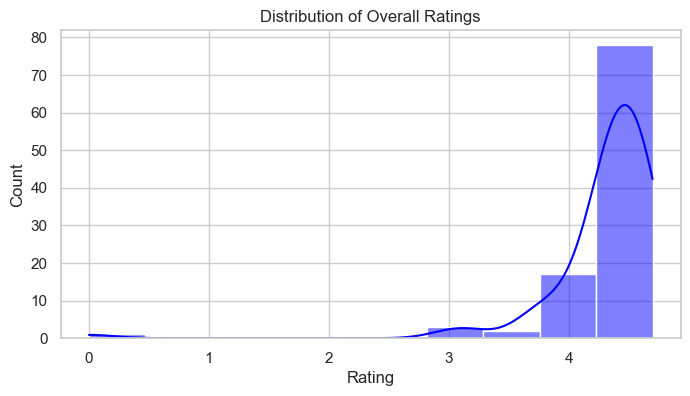

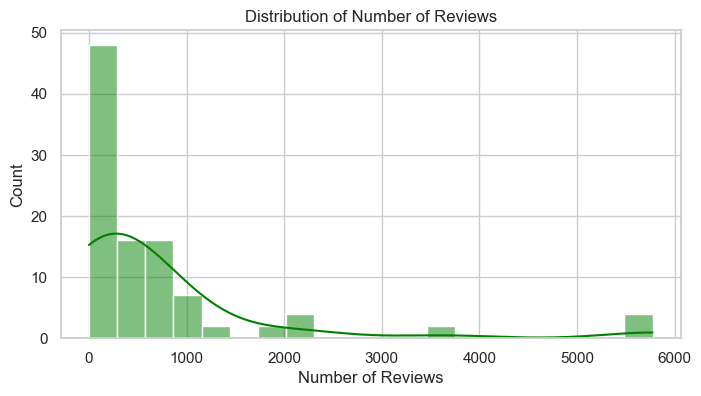

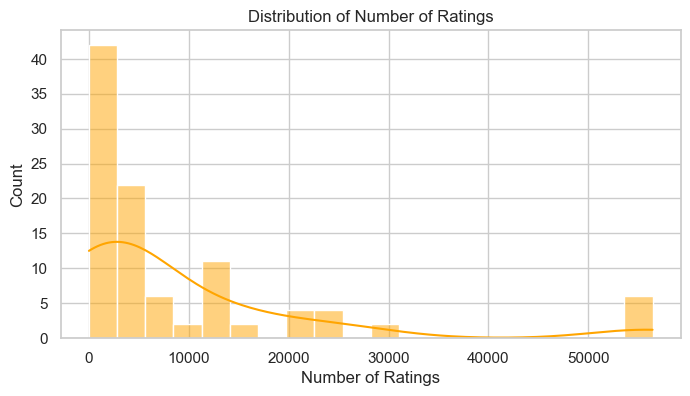

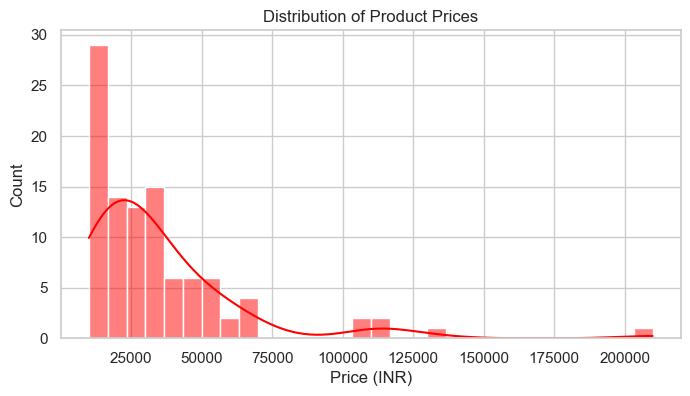

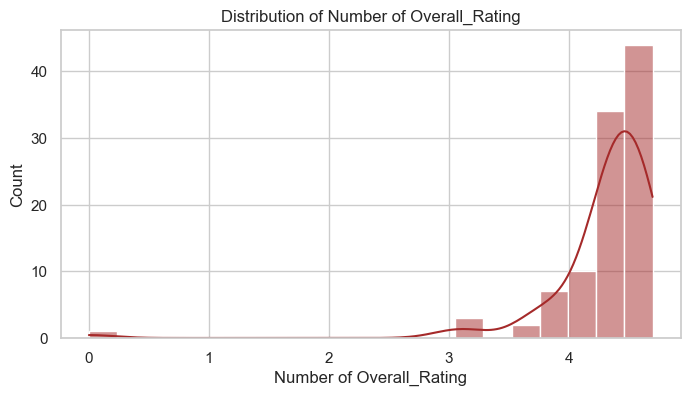

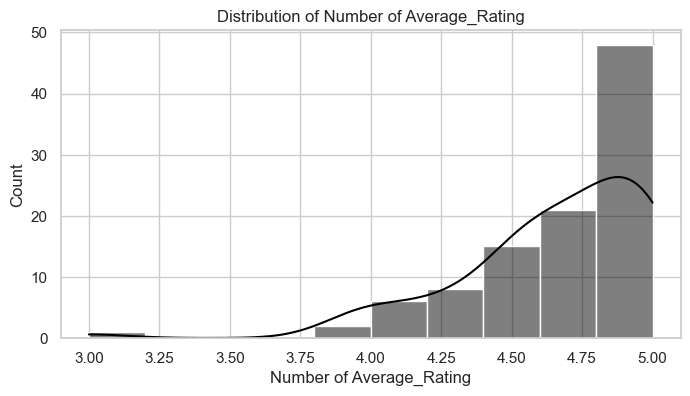

In [78]:
sns.set(style = "whitegrid")

plot_configs = [ # Columns, Bins, Color, Title, xlabel
                ("Overall_Rating", 10, 'blue', "Distribution of Overall Ratings", "Rating"),
                ("No_of_Reviews", 20, 'green', "Distribution of Number of Reviews", "Number of Reviews"),
                ("No_of_Ratings", 20, 'orange', "Distribution of Number of Ratings", "Number of Ratings"),
                ("Price", 30, 'red', "Distribution of Product Prices", "Price (INR)"),
                ("Overall_Rating", 20, 'brown', "Distribution of Number of Overall_Rating", "Number of Overall_Rating"),
                ("Average_Rating", 10, 'black', "Distribution of Number of Average_Rating", "Number of Average_Rating"),
]

for col, bins, color, title, xlabel in plot_configs:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), bins=bins, kde=True, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Count")
    plt.show()

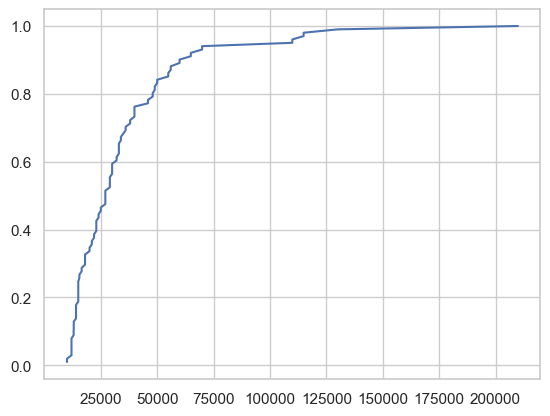

In [79]:
# ECDF (Empirical Cumulative Distribution Function)
# Helps to understand the percentile distribution.

from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['Price'])
plt.plot(ecdf.x, ecdf.y)
plt.show()

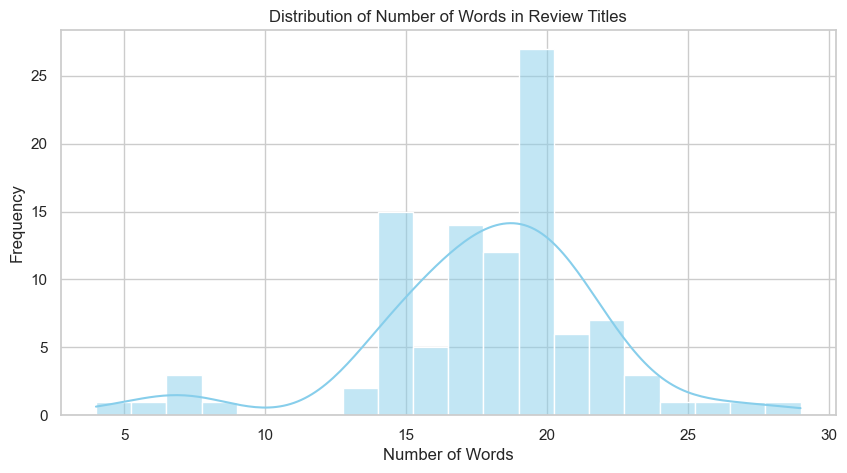

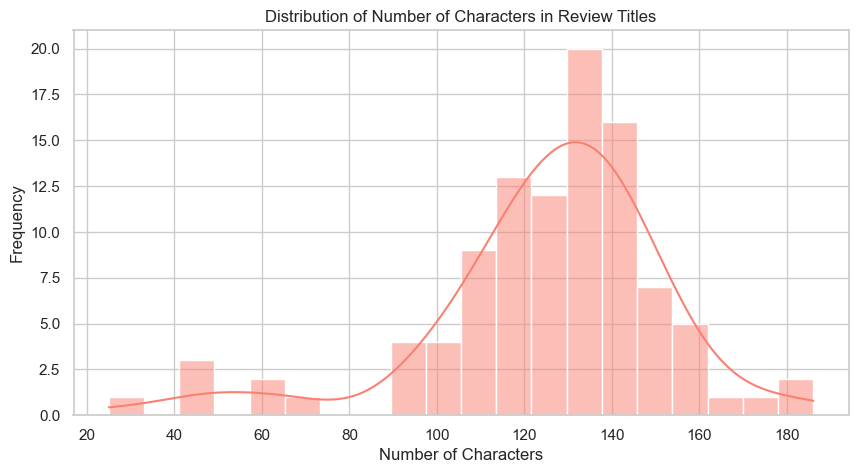

In [80]:
# Reviews title word_count and char_count

df['Title_Word_Count'] = df['Review_Titles'].fillna('').apply(lambda x: len(x.split()))
df['Title_Char_Count'] = df['Review_Titles'].fillna('').apply(lambda x: len(x))
    
# Plotting histogram of word counts
plt.figure(figsize=(10,5))
sns.histplot(df['Title_Word_Count'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Number of Words in Review Titles')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram of character counts
plt.figure(figsize=(10,5))
sns.histplot(df['Title_Char_Count'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Number of Characters in Review Titles')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

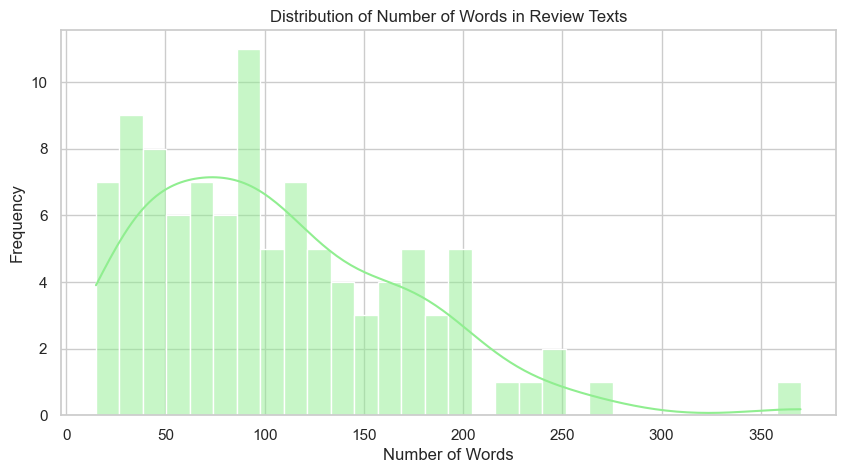

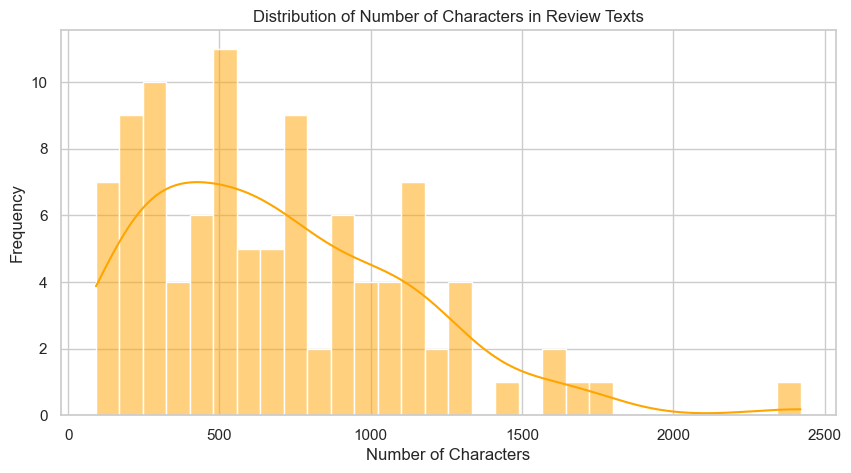

In [81]:
# Reviews text word_count and char_count

df['Text_Word_Count'] = df['Review_Texts'].fillna('').apply(lambda x: len(x.split()))
df['Text_Char_Count'] = df['Review_Texts'].fillna('').apply(lambda x: len(x))
    
# Plotting histogram of word counts
plt.figure(figsize=(10,5))
sns.histplot(df['Text_Word_Count'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Number of Words in Review Texts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting histogram of character counts
plt.figure(figsize=(10,5))
sns.histplot(df['Text_Char_Count'], bins=30, kde=True, color='orange')
plt.title('Distribution of Number of Characters in Review Texts')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

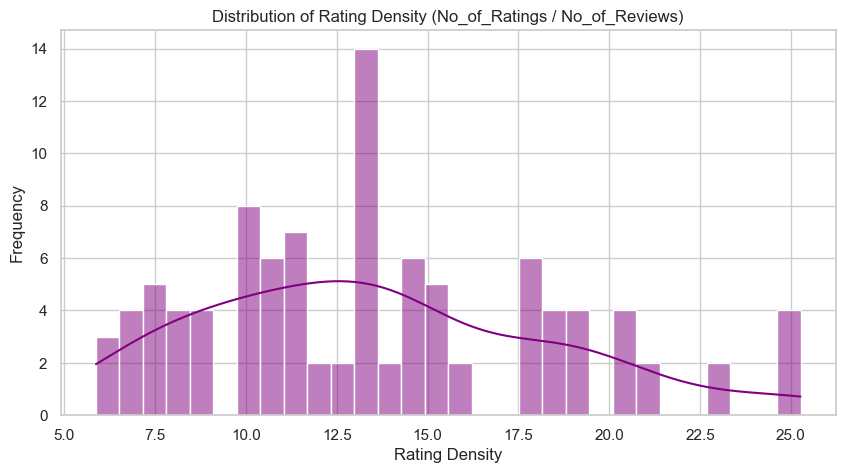

In [82]:
df['Rating_Density'] = df['No_of_Ratings'] / df['No_of_Reviews']
df = df.dropna(subset=['Rating_Density'])
    
# Plotting histogram of Rating Density
plt.figure(figsize=(10,5))
sns.histplot(df['Rating_Density'], bins=30, kde=True, color='purple')
plt.title('Distribution of Rating Density (No_of_Ratings / No_of_Reviews)')
plt.xlabel('Rating Density')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

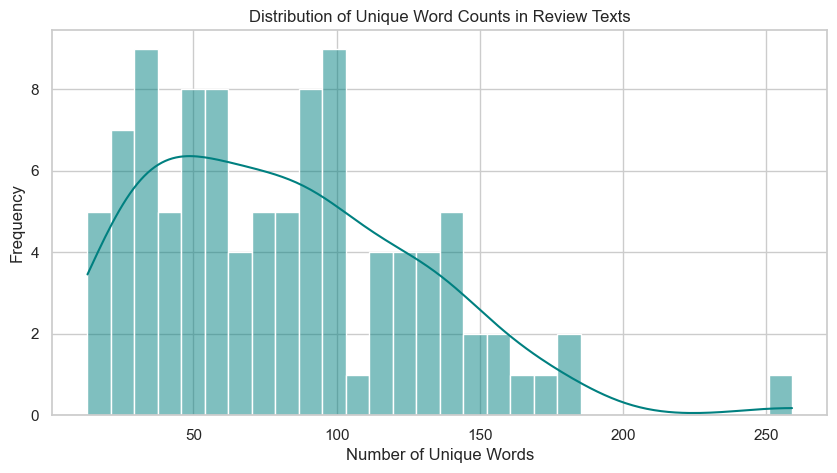

In [83]:
df['Unique_Word_Count'] = df['Review_Texts'].apply(lambda x: len(set(x.lower().split())))

# Plotting histogram of unique word counts
plt.figure(figsize=(10,5))
sns.histplot(df['Unique_Word_Count'], bins=30, kde=True, color='teal')
plt.title('Distribution of Unique Word Counts in Review Texts')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [84]:
# Assigning the sentiment

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['Sentiment_Score'] = df['Review_Texts'].apply(lambda x: sia.polarity_scores(x)['compound'])

def classify(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Review_Sentiment'] = df['Sentiment_Score'].apply(classify)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jvpurushotham/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


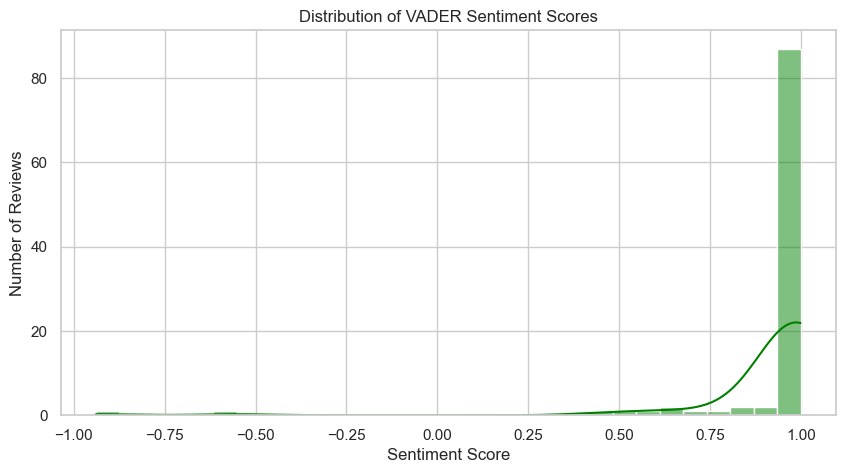

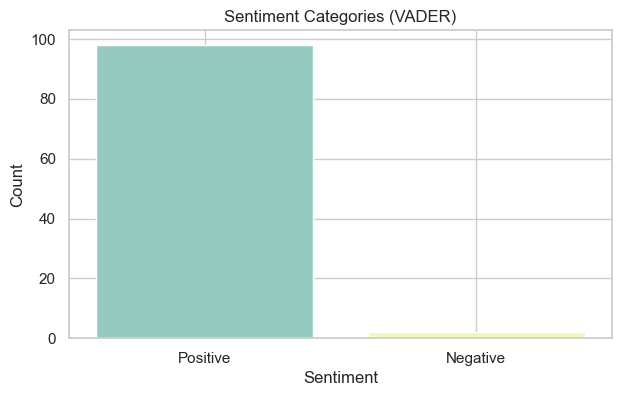

In [85]:
# Plot histogram of sentiment scores
plt.figure(figsize=(10,5))
sns.histplot(df['Sentiment_Score'], bins=30, kde=True, color='green')
plt.title('Distribution of VADER Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

# Plot sentiment label distribution
plt.figure(figsize=(7,4))
sns.countplot(x='Review_Sentiment', data=df, palette='Set3')
plt.title('Sentiment Categories (VADER)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [86]:
print(df['Review_Sentiment'].value_counts())

Review_Sentiment
Positive    98
Negative     2
Name: count, dtype: int64


### Keyword extraction

In [88]:
from collections import Counter

# Keyword Extraction for Positive and Negative Reviews
def get_keywords(texts, top_n=20):
    words = []
    for text in texts:
        tokens = text.lower().split()
        filtered = [word for word in tokens if word.isalpha() and word not in stop_words]
        words.extend(filtered)
    return Counter(words).most_common(top_n)

positive_reviews = df[df['Review_Sentiment'] == 'Positive']['Review_Texts']
positive_keywords = get_keywords(positive_reviews)

negative_reviews = df[df['Review_Sentiment'] == 'Negative']['Review_Texts']
negative_keywords = get_keywords(negative_reviews)


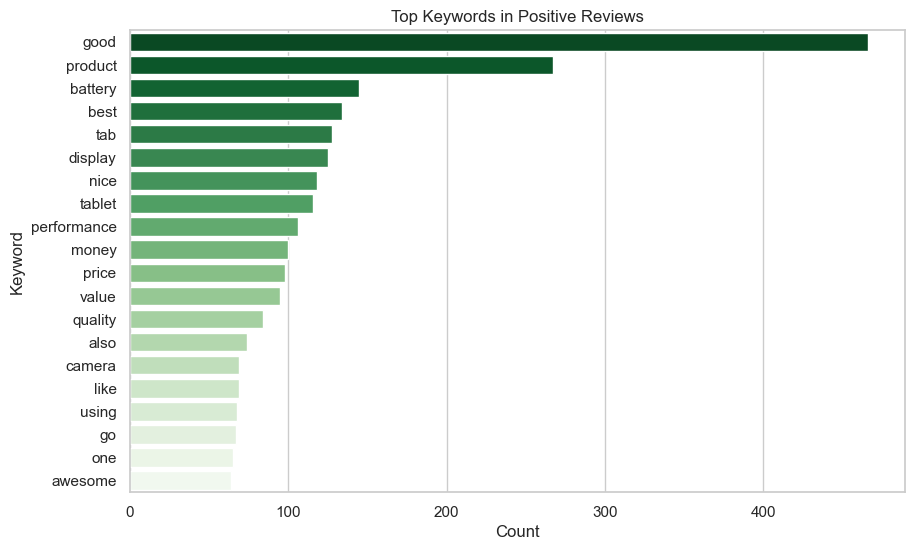

In [89]:
# Positive keywords visualisation 

pos_words, pos_counts = zip(*positive_keywords)
plt.figure(figsize=(10,6))
sns.barplot(x=list(pos_counts), y=list(pos_words), palette='Greens_r')
plt.title('Top Keywords in Positive Reviews')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

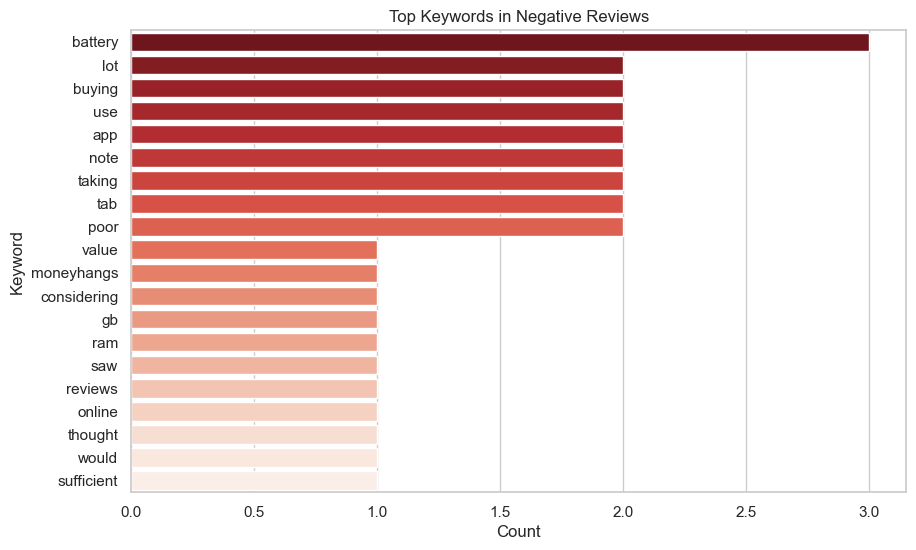

In [90]:
# Negative keywords visualisation 

neg_words, neg_counts = zip(*negative_keywords)
plt.figure(figsize=(10,6))
sns.barplot(x=list(neg_counts), y=list(neg_words), palette='Reds_r')
plt.title('Top Keywords in Negative Reviews')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()

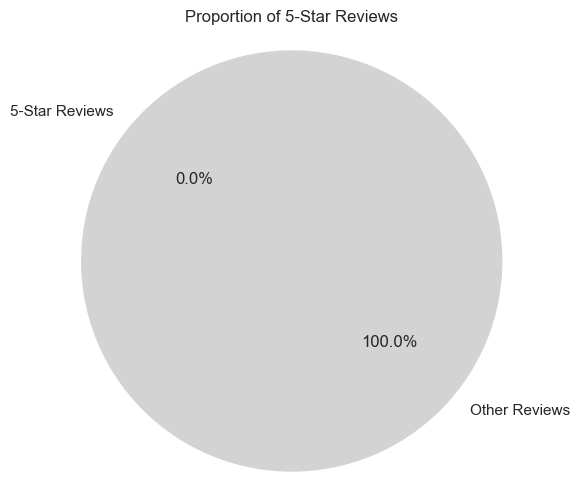

In [91]:
# 5-Start reviews

five_star_count = (df['Overall_Rating'] == 5.0).sum()
other_count = (df['Overall_Rating'] != 5.0).sum()

labels = ['5-Star Reviews', 'Other Reviews']
sizes = [five_star_count, other_count]
colors = ['blue', 'lightgrey']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of 5-Star Reviews')
plt.axis('equal')  
plt.show()

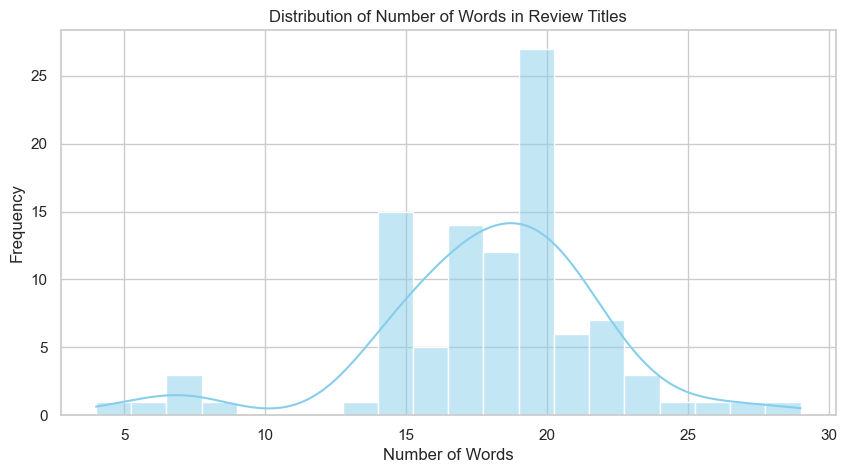

In [92]:
df['Title_Word_Count'] = df['Review_Titles'].fillna('').apply(lambda x: len(x.split()))
df['Title_Char_Count'] = df['Review_Titles'].fillna('').apply(lambda x: len(x))
    
# Plotting histogram of word counts
plt.figure(figsize=(10,5))
sns.histplot(df['Title_Word_Count'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Number of Words in Review Titles')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

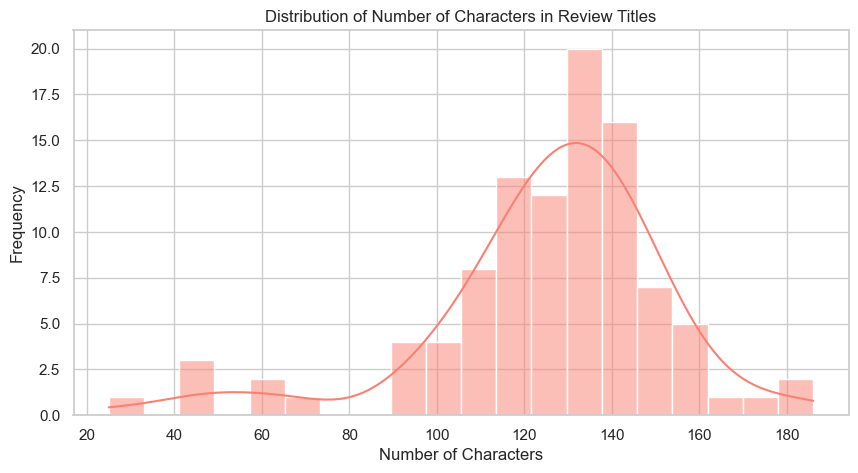

In [93]:
# Plotting histogram of character counts
plt.figure(figsize=(10,5))
sns.histplot(df['Title_Char_Count'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Number of Characters in Review Titles')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [94]:
df['All_Reviews'] = df['Review_Titles'] + ' ' + df['Review_Texts']

features = ['battery', 'display', 'performance', 'camera']
feature_counts = {feature: df['All_Reviews'].str.count(rf'\b{feature}\b').sum() for feature in features}

feature_df = pd.DataFrame(list(feature_counts.items()), columns=['Feature', 'Mentions'])
feature_df.sort_values(by='Mentions', ascending=False, inplace=True)

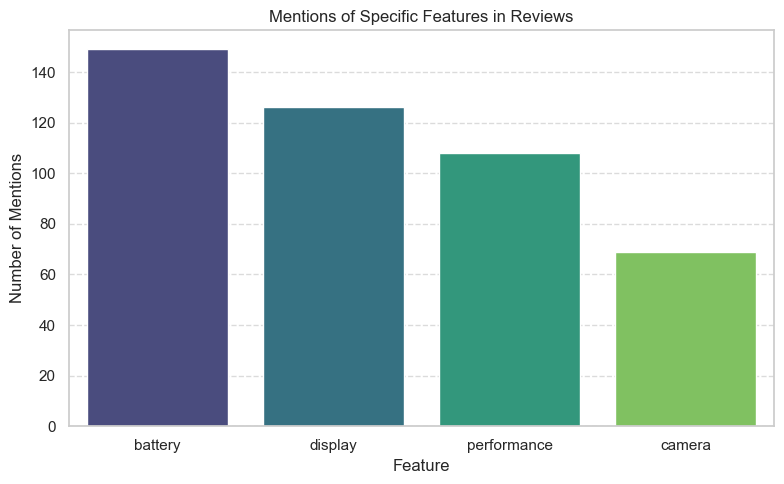

In [95]:
# Plotting the features

plt.figure(figsize=(8, 5))
sns.barplot(data=feature_df, x='Feature', y='Mentions', palette='viridis')
plt.title('Mentions of Specific Features in Reviews')
plt.xlabel('Feature')
plt.ylabel('Number of Mentions')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Distribution of Specifications

In [97]:
df.head()

,Unique_ID,Product_URL,Product_Title,Brand,Model,Specifications,WiFi_Type,Colour,No_of_Ratings,No_of_Reviews,...,Review_Texts,Title_Word_Count,Title_Char_Count,Text_Word_Count,Text_Char_Count,Rating_Density,Unique_Word_Count,Sentiment_Score,Review_Sentiment,All_Reviews
0,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,SAMSUNG,Galaxy Tab A9+,8 GB RAM 128 GB ROM 11.0 inch,Wi-Fi+5G,Graphite,21349.0,845.0,...,best tablet budget review daysdisplay battery ...,18,133,172,1152,25.265089,122,0.9982,Positive,very good just wow brilliant perfect product h...
1,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,SAMSUNG,Galaxy Tab A9+,8 GB RAM 128 GB ROM 11.0 inch,Wi-Fi+5G,Graphite,21349.0,845.0,...,nice performance lag issue good product im usi...,17,118,32,210,25.265089,23,0.9705,Positive,perfect product very good delightful wonderful...
2,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,realme,Pad 2 Lite,8 GB RAM 128 GB ROM 11.0 inch,4G Tablet,Nebula Purple,2979.0,259.0,...,super budget pad daily use if students definit...,17,112,53,333,11.501931,42,0.9883,Positive,brilliant worth every penny wonderful worth th...
3,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,realme,Pad 2 Lite,8 GB RAM 128 GB ROM 11.0 inch,4G Tablet,Nebula Purple,2979.0,259.0,...,nice pad very nice product product of pricing ...,19,121,60,352,11.501931,38,0.9908,Positive,perfect product nice product excellent just wo...
4,30,https://www.flipkart.com/oneplus-pad-go-8-gb-r...,OnePlus Pad Go 8 GB RAM 128 GB ROM 11.35 inch ...,OnePlus,Pad Go,8 GB RAM 128 GB ROM 11.35 inch,4G Tablet,Twin Mint,13869.0,901.0,...,nice product price range good displaygood perf...,20,141,165,1016,15.392897,125,0.9955,Positive,awesome mindblowing purchase terrific purchase...


In [98]:
print(df.dtypes)

Unique_ID                int8
Product_URL            object
Product_Title          object
Brand                category
Model                category
Specifications       category
WiFi_Type            category
Colour               category
No_of_Ratings         float64
No_of_Reviews         float64
Overall_Rating        float64
Average_Rating        float64
Price                 float64
Review_Titles          object
Review_Texts           object
Title_Word_Count        int64
Title_Char_Count        int64
Text_Word_Count         int64
Text_Char_Count         int64
Rating_Density        float64
Unique_Word_Count       int64
Sentiment_Score       float64
Review_Sentiment       object
All_Reviews            object
dtype: object


In [99]:
# Extracting ram, storage and screensize

df['Specifications'] = df['Specifications'].astype(str)

def extract_specifications(spec):
    ram_match = re.search(r'(\d+)\s*gb\s*ram', spec, re.IGNORECASE)
    ram = int(ram_match.group(1)) if ram_match else None
    
    storage_match = re.search(r'(\d+)\s*gb\s*rom', spec, re.IGNORECASE)
    storage = int(storage_match.group(1)) if storage_match else None
    
    screen_size_match = re.search(r'(\d+\.?\d*)\s*inch', spec, re.IGNORECASE)
    screen_size = float(screen_size_match.group(1)) if screen_size_match else None
    
    return pd.Series([ram, storage, screen_size])

df.drop(columns=['RAM_GB', 'Storage_GB', 'Screen_Size_Inches'], errors='ignore', inplace=True)

df[['RAM_GB', 'Storage_GB', 'Screen_Size_Inches']] = df['Specifications'].apply(
    lambda x: extract_specifications(x)
)

df['RAM_GB'] = df['RAM_GB'].fillna(0).astype(int)
df['Storage_GB'] = df['Storage_GB'].fillna(0).astype(int)
df['Screen_Size_Inches'] = df['Screen_Size_Inches'].fillna(0.0)

In [100]:
df.sample(10)

,Unique_ID,Product_URL,Product_Title,Brand,Model,Specifications,WiFi_Type,Colour,No_of_Ratings,No_of_Reviews,...,Text_Word_Count,Text_Char_Count,Rating_Density,Unique_Word_Count,Sentiment_Score,Review_Sentiment,All_Reviews,RAM_GB,Storage_GB,Screen_Size_Inches
39,7,https://www.flipkart.com/apple-ipad-10th-gen-6...,Apple iPad (10th Gen) 64 GB ROM 10.9 inch with...,Apple,10th Gen,64 GB ROM 10.9 inch with,Wi-Fi Only,Silver,13382.0,661.0,...,111,732,20.245083,87,0.9893,Positive,classy product worth every penny just wow exce...,0,64,10.9
91,38,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,SAMSUNG,Galaxy Tab A9+,8 GB RAM 128 GB ROM 11.0 inch,Wi-Fi Only,GRAY,21349.0,845.0,...,172,1152,25.265089,122,0.9982,Positive,very good just wow brilliant perfect product h...,8,128,11.0
68,3,https://www.flipkart.com/apple-2022-ipad-pro-4...,Apple 2022 iPad Pro (4th Gen) 512 GB ROM 11.0 ...,Apple,4th Gen,512 GB ROM 11.0 inch with,Wi-Fi+5G (Silver,Silver,1048.0,72.0,...,128,917,14.555556,100,0.9963,Positive,must buy highly recommended wonderful must buy...,0,512,11.0
0,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,SAMSUNG,Galaxy Tab A9+,8 GB RAM 128 GB ROM 11.0 inch,Wi-Fi+5G,Graphite,21349.0,845.0,...,172,1152,25.265089,122,0.9982,Positive,very good just wow brilliant perfect product h...,8,128,11.0
23,21,https://www.flipkart.com/lenovo-tab-m10-fhd-3r...,Lenovo Tab M10 FHD 3rd Gen 4 GB RAM 64 GB ROM ...,Lenovo,Tab M10 FHD 3rd Gen,4 GB RAM 64 GB ROM 10.1 inch,4G Tablet,Storm Grey,5547.0,305.0,...,26,154,18.186885,22,0.9776,Positive,useless product must buy really nice terrific ...,4,64,10.1
52,42,https://www.flipkart.com/samsung-galaxy-tab-s9...,SAMSUNG Galaxy Tab S9 FE 6 GB RAM 128 GB ROM 1...,SAMSUNG,Galaxy Tab S9 FE,6 GB RAM 128 GB ROM 10.9 inch,Wi-Fi Only,Silver,964.0,51.0,...,200,1308,18.901961,158,0.9976,Positive,great product great product awesome valueformo...,6,128,10.9
46,53,https://www.flipkart.com/realme-pad-mini-6-gb-...,realme Pad Mini 6 GB RAM 128 GB ROM 8.7 inch w...,realme,Pad Mini,6 GB RAM 128 GB ROM 8.7 inch,4G Tablet,Grey,24219.0,1806.0,...,92,616,13.410299,58,0.9955,Positive,pretty good must buy good quality product deli...,6,128,8.7
95,12,https://www.flipkart.com/apple-ipad-mini-6th-g...,Apple iPad mini (6th Gen) 256 GB ROM 8.3 inch ...,Apple,6th Gen,256 GB ROM 8.3 inch with,Wi-Fi Only,Space Grey,1046.0,96.0,...,19,126,10.895833,18,0.9702,Positive,must buy excellent best in the market best in ...,0,256,8.3
33,1,https://www.flipkart.com/acer-one-10-6-gb-ram-...,Acer One 10 6 GB RAM 128 GB ROM 10.1 inch with...,Acer,One 10,6 GB RAM 128 GB ROM 10.1 inch,4G Tablet,Space Grey,212.0,14.0,...,126,902,15.142857,94,0.7096,Positive,i love flipkart team highly recommended hated ...,6,128,10.1
54,8,https://www.flipkart.com/apple-ipad-9th-gen-64...,Apple iPad (9th Gen) 64 GB ROM 10.2 inch with ...,Apple,9th Gen,64 GB ROM 10.2 inch with,Wi-Fi Only,Silver,54661.0,3630.0,...,151,1055,15.058127,115,0.9964,Positive,best in the market best in the market great pr...,0,64,10.2


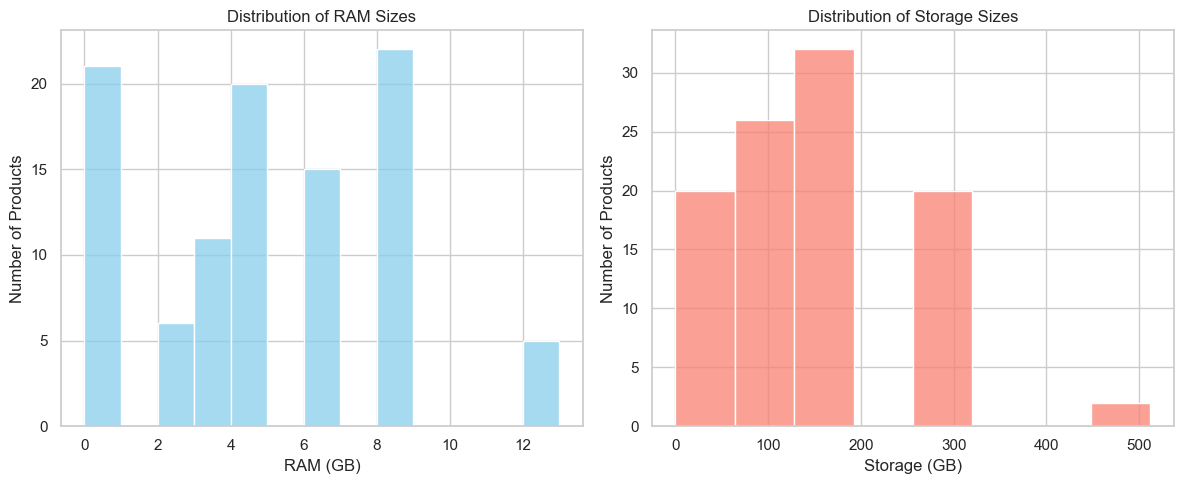

In [101]:
# Plotting the new three columns to find the distribution 

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['RAM_GB'], bins=range(df['RAM_GB'].min(), df['RAM_GB'].max()+2, 1), kde=False, color='skyblue')
plt.title('Distribution of RAM Sizes')
plt.xlabel('RAM (GB)')
plt.ylabel('Number of Products')

# Plot Storage distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Storage_GB'], bins=range(df['Storage_GB'].min(), df['Storage_GB'].max()+64, 64), kde=False, color='salmon')
plt.title('Distribution of Storage Sizes')
plt.xlabel('Storage (GB)')
plt.ylabel('Number of Products')

plt.tight_layout()
plt.show()

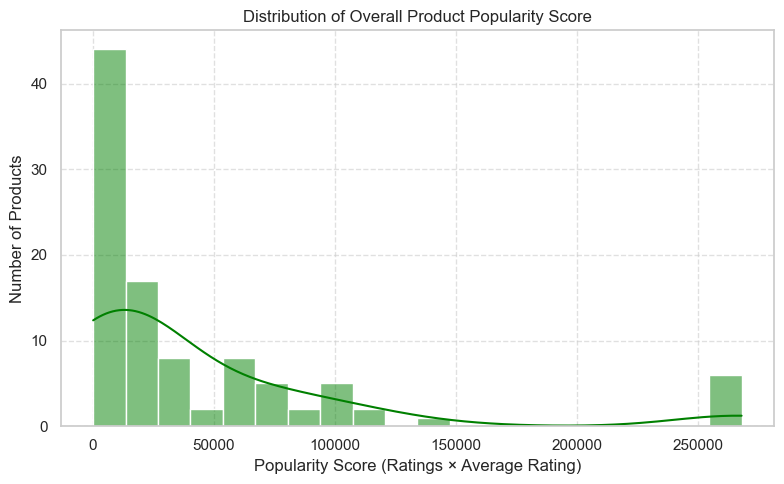

In [102]:
# Giving the popularity score which is No_of_Ratings * Average_Rating

df['Popularity_Score'] = df['No_of_Ratings'] * df['Average_Rating']

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Popularity_Score'], bins=20, kde=True, color='green')
plt.title('Distribution of Overall Product Popularity Score')
plt.xlabel('Popularity Score (Ratings × Average Rating)')
plt.ylabel('Number of Products')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [103]:
df.columns

Index(['Unique_ID', 'Product_URL', 'Product_Title', 'Brand', 'Model',
       'Specifications', 'WiFi_Type', 'Colour', 'No_of_Ratings',
       'No_of_Reviews', 'Overall_Rating', 'Average_Rating', 'Price',
       'Review_Titles', 'Review_Texts', 'Title_Word_Count', 'Title_Char_Count',
       'Text_Word_Count', 'Text_Char_Count', 'Rating_Density',
       'Unique_Word_Count', 'Sentiment_Score', 'Review_Sentiment',
       'All_Reviews', 'RAM_GB', 'Storage_GB', 'Screen_Size_Inches',
       'Popularity_Score'],
      dtype='object')

### Bivariate Analysis

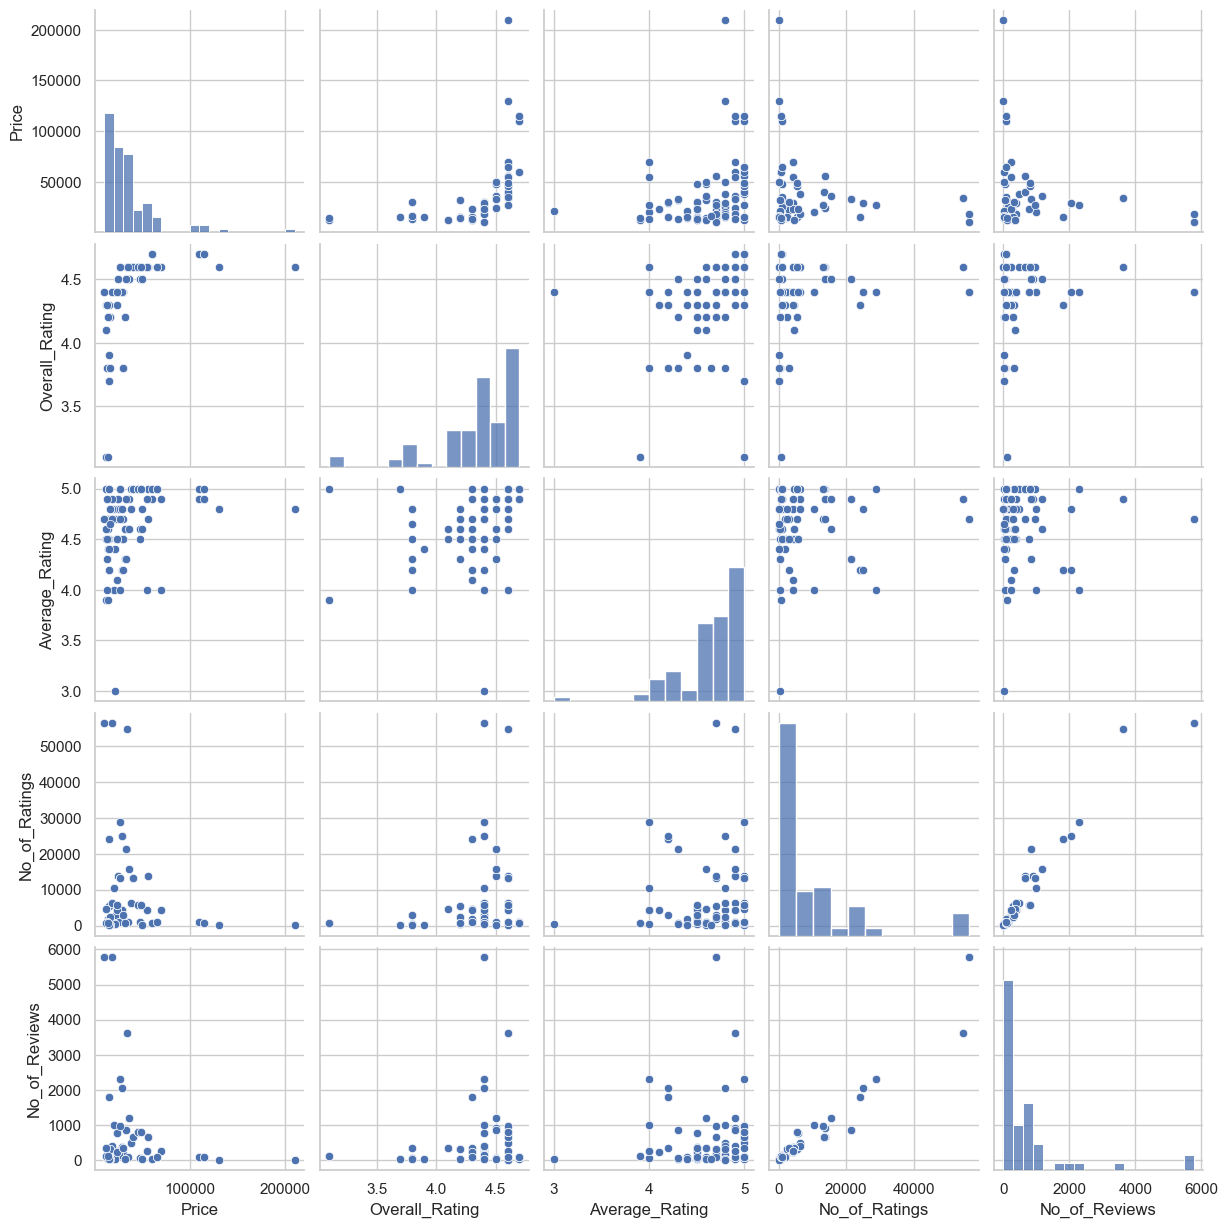

In [105]:
sns.pairplot(df[['Price', 'Overall_Rating', 'Average_Rating', 'No_of_Ratings', 'No_of_Reviews']])
plt.show()

**Text_Char_Count vs Overall_Rating**

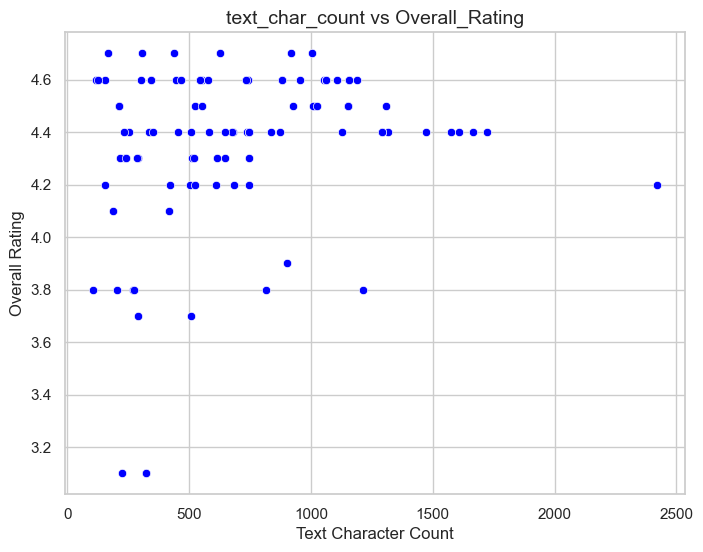

In [107]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Text_Char_Count', y='Overall_Rating', color='blue')
plt.title('text_char_count vs Overall_Rating', fontsize=14)
plt.xlabel('Text Character Count', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
plt.show()

**Rating_Density vs Overall_Rating**

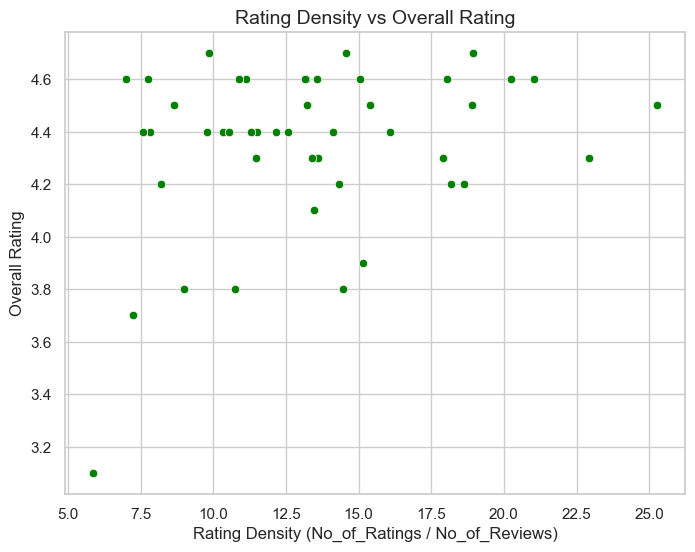

In [109]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rating_Density', y='Overall_Rating', color='green')
plt.title('Rating Density vs Overall Rating', fontsize=14)
plt.xlabel('Rating Density (No_of_Ratings / No_of_Reviews)', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
plt.show()

**No_of_Reviews vs Review_Sentiment**

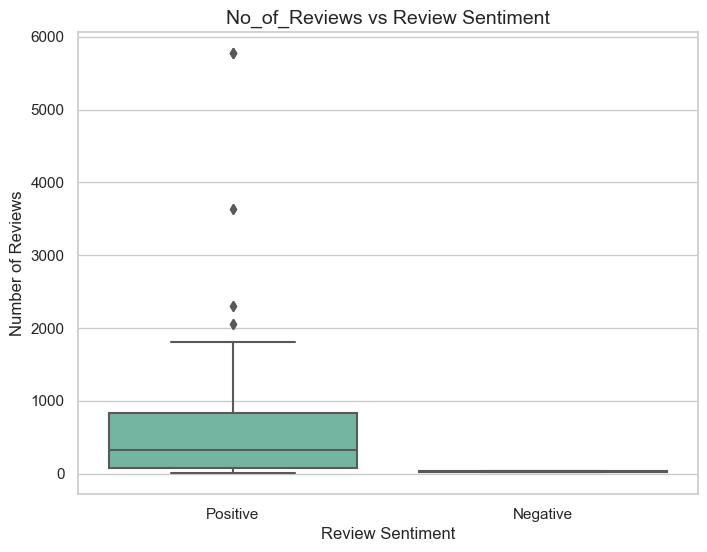

In [111]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Review_Sentiment', y='No_of_Reviews', palette='Set2')
plt.title('No_of_Reviews vs Review Sentiment', fontsize=14)
plt.xlabel('Review Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.show()

**RAM_GB vs Overall_Rating**

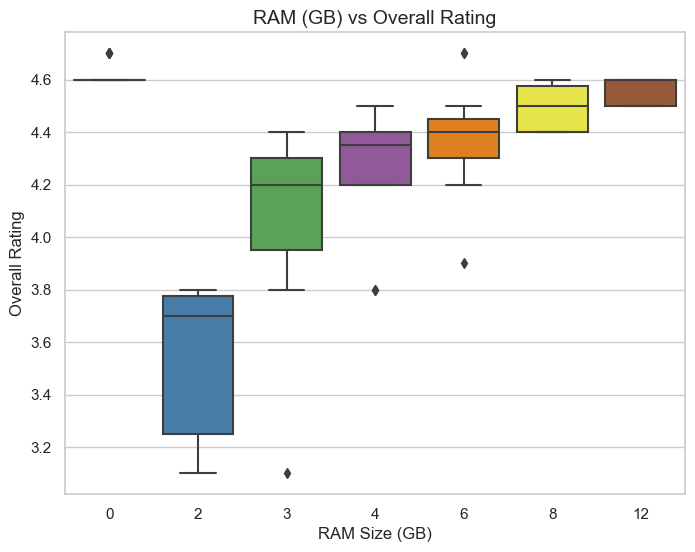

In [113]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='RAM_GB', y='Overall_Rating', palette='Set1')
plt.title('RAM (GB) vs Overall Rating', fontsize=14)
plt.xlabel('RAM Size (GB)', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
plt.show()

**Storage_GB vs Overall_Rating**

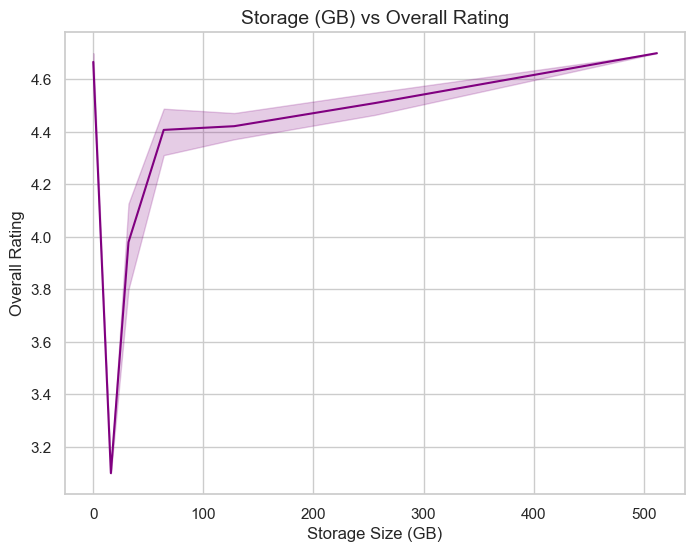

In [115]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Storage_GB', y='Overall_Rating', color='purple')
plt.title('Storage (GB) vs Overall Rating', fontsize=14)
plt.xlabel('Storage Size (GB)', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
plt.show()

**Screen_Size_Inches vs Overall_Rating**

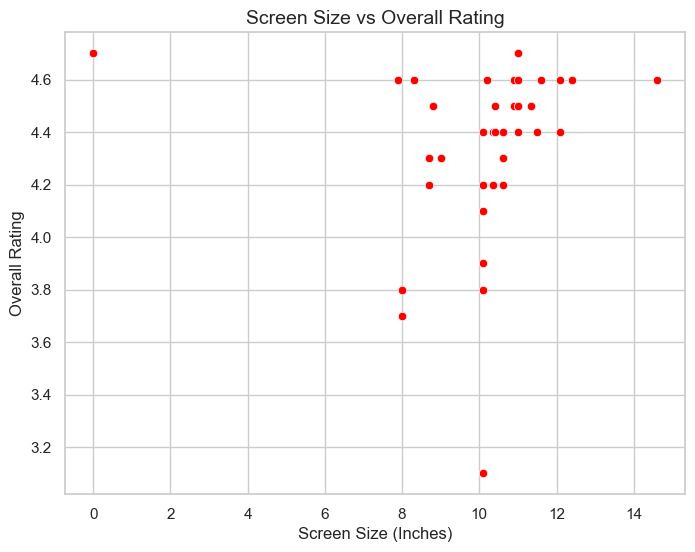

In [117]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Screen_Size_Inches', y='Overall_Rating', color='red')
plt.title('Screen Size vs Overall Rating', fontsize=14)
plt.xlabel('Screen Size (Inches)', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
plt.show()

**Popularity_Score vs Overall_Rating**

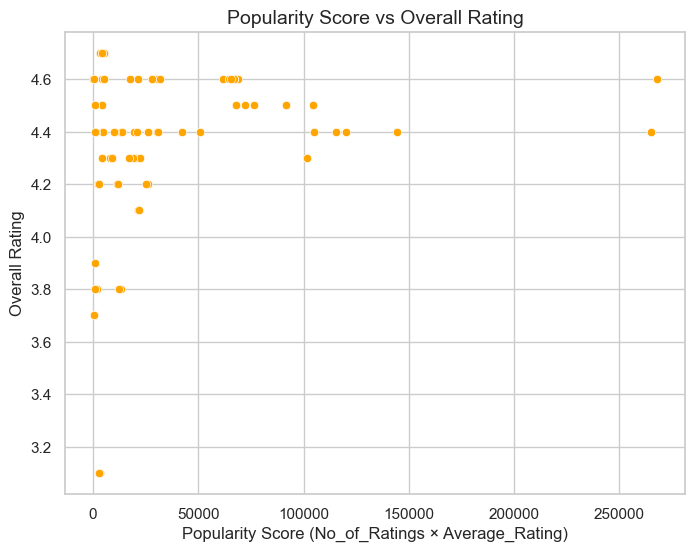

In [119]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Popularity_Score', y='Overall_Rating', color='orange')
plt.title('Popularity Score vs Overall Rating', fontsize=14)
plt.xlabel('Popularity Score (No_of_Ratings × Average_Rating)', fontsize=12)
plt.ylabel('Overall Rating', fontsize=12)
plt.show()

**Sentiment_Score vs Review_Sentiment**

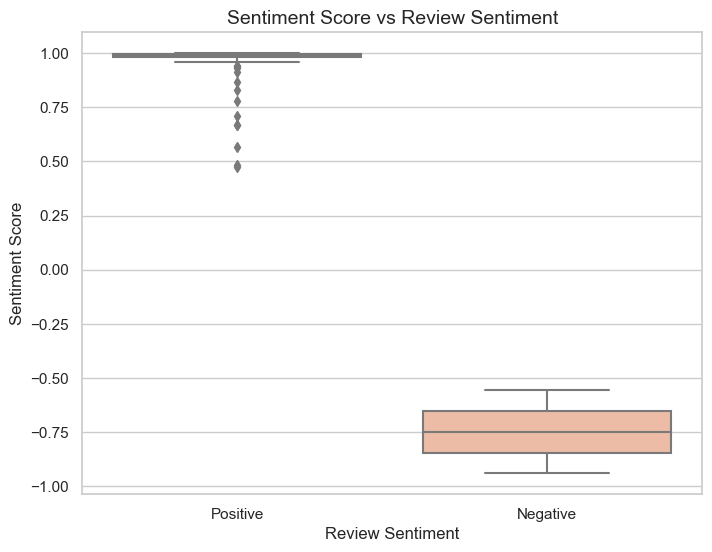

In [121]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Review_Sentiment', y='Sentiment_Score', palette='coolwarm')
plt.title('Sentiment Score vs Review Sentiment', fontsize=14)
plt.xlabel('Review Sentiment', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.show()

**Storage_GB vs Popularity_Score**

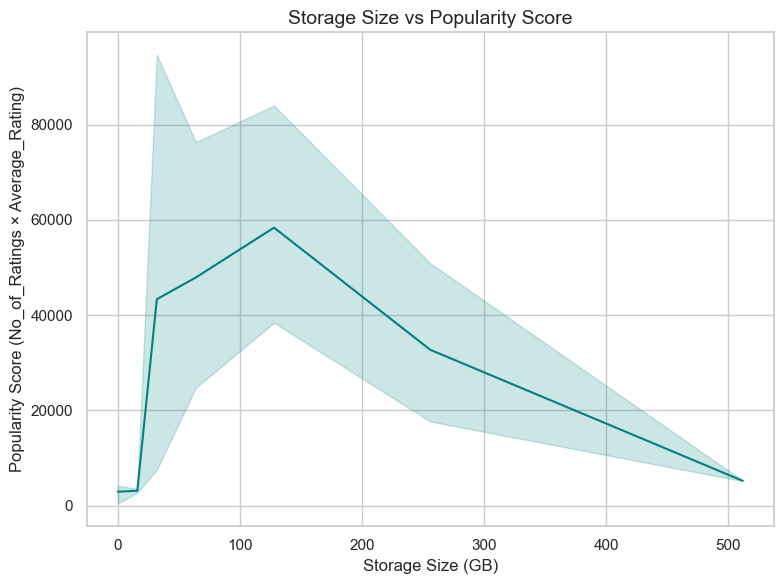

In [123]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Storage_GB', y='Popularity_Score', color='teal')
plt.title('Storage Size vs Popularity Score', fontsize=14)
plt.xlabel('Storage Size (GB)', fontsize=12)
plt.ylabel('Popularity Score (No_of_Ratings × Average_Rating)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

**Correlation between Popularity_Score, Sentiment_Score, Average_Rating, Unique_Word_Count**

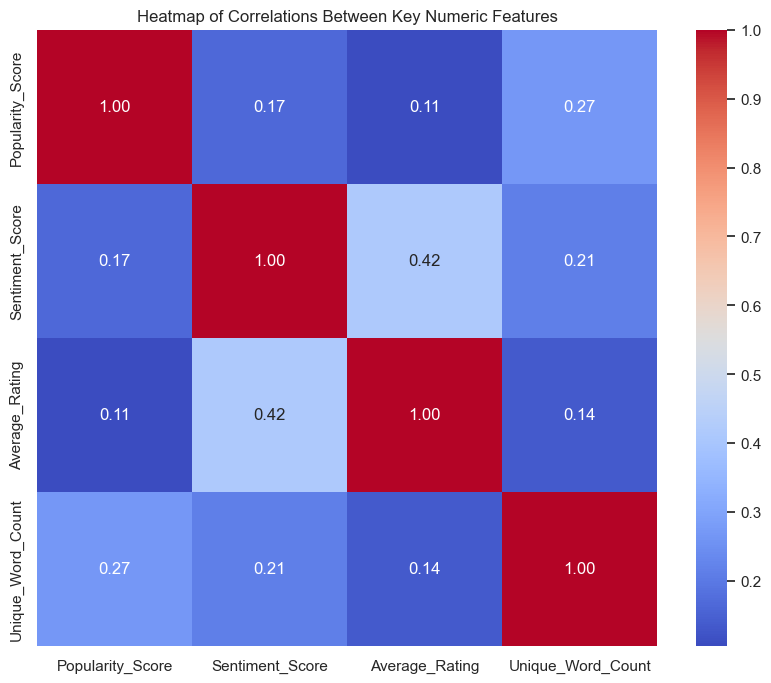

In [125]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Popularity_Score', 'Sentiment_Score', 'Average_Rating', 'Unique_Word_Count']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlations Between Key Numeric Features')
plt.show()

**WiFi_Type vs average Sentiment_Score**

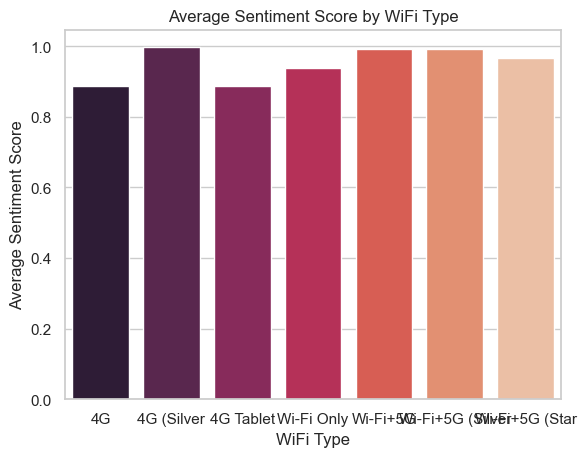

In [127]:
grouped_wifi_sentiment = df.groupby('WiFi_Type')['Sentiment_Score'].mean().reset_index()

sns.barplot(data=grouped_wifi_sentiment, x='WiFi_Type', y='Sentiment_Score', palette='rocket')
plt.title('Average Sentiment Score by WiFi Type')
plt.ylabel('Average Sentiment Score')
plt.xlabel('WiFi Type')
plt.show()

**Sorted Storage_GB vs average Overall_Rating**

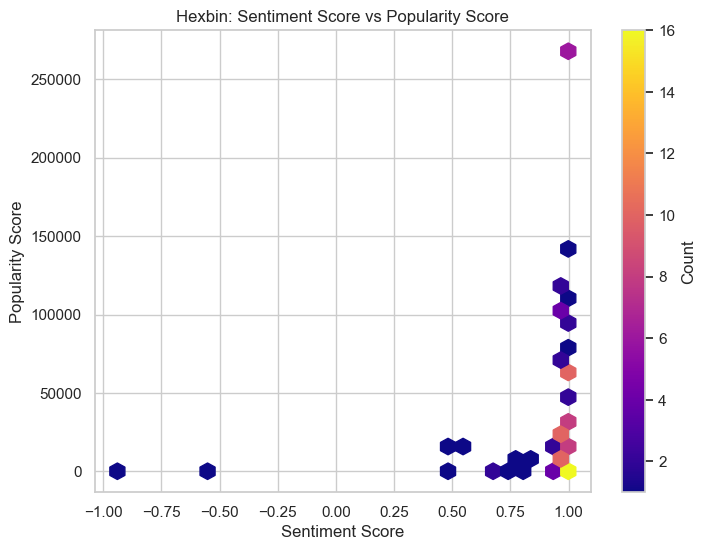

In [129]:
plt.figure(figsize=(8,6))
plt.hexbin(df['Sentiment_Score'], df['Popularity_Score'], gridsize=30, cmap='plasma', mincnt=1)
plt.colorbar(label='Count')
plt.xlabel('Sentiment Score')
plt.ylabel('Popularity Score')
plt.title('Hexbin: Sentiment Score vs Popularity Score')
plt.show()

**Colour vs count of Review_Sentiment categories**

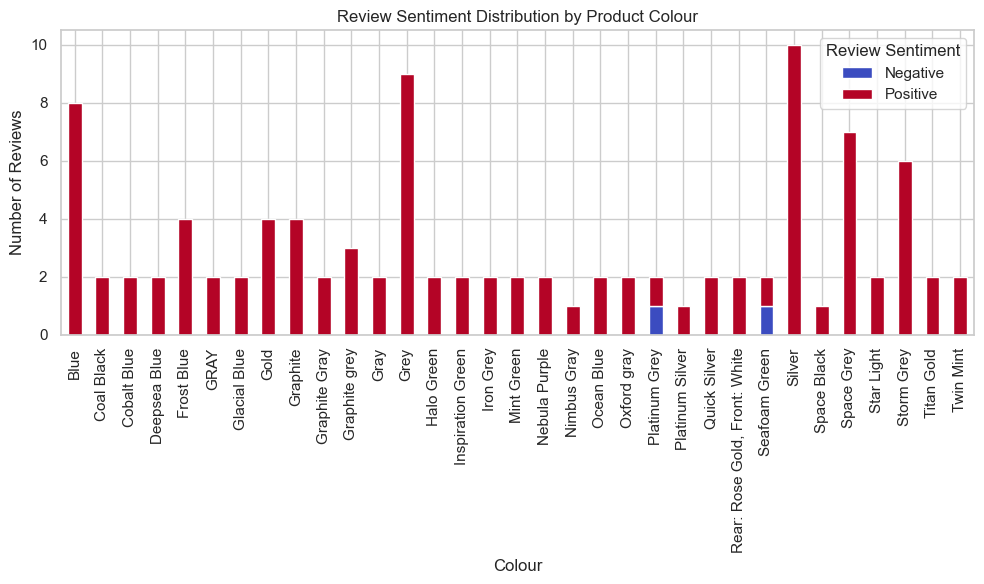

In [131]:
color_sentiment_counts = pd.crosstab(df['Colour'], df['Review_Sentiment'])

color_sentiment_counts.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10,6))
plt.title('Review Sentiment Distribution by Product Colour')
plt.xlabel('Colour')
plt.ylabel('Number of Reviews')
plt.legend(title='Review Sentiment')
plt.tight_layout()
plt.show()

In [132]:
df.columns

Index(['Unique_ID', 'Product_URL', 'Product_Title', 'Brand', 'Model',
       'Specifications', 'WiFi_Type', 'Colour', 'No_of_Ratings',
       'No_of_Reviews', 'Overall_Rating', 'Average_Rating', 'Price',
       'Review_Titles', 'Review_Texts', 'Title_Word_Count', 'Title_Char_Count',
       'Text_Word_Count', 'Text_Char_Count', 'Rating_Density',
       'Unique_Word_Count', 'Sentiment_Score', 'Review_Sentiment',
       'All_Reviews', 'RAM_GB', 'Storage_GB', 'Screen_Size_Inches',
       'Popularity_Score'],
      dtype='object')

### Multivariate Analysis

**Brand, RAM, and Storage vs. Overall_Rating**

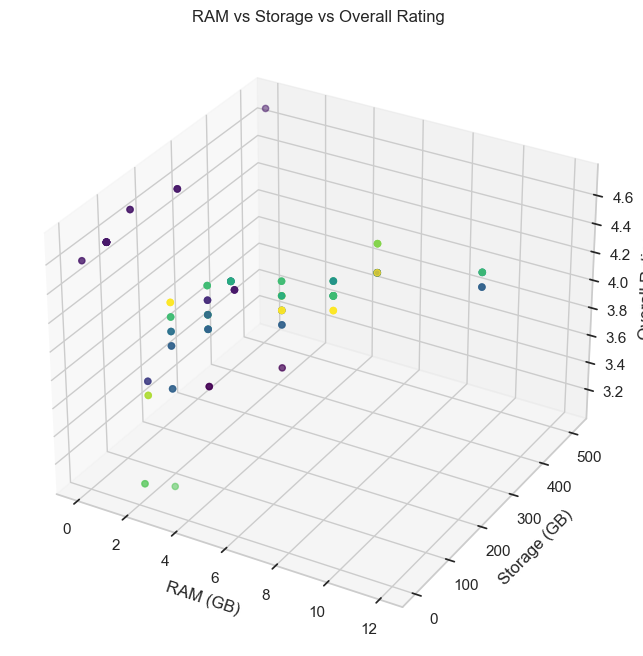

In [135]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['RAM_GB'], df['Storage_GB'], df['Overall_Rating'], c=df['Brand'].astype('category').cat.codes, cmap='viridis', marker='o')

ax.set_xlabel('RAM (GB)')
ax.set_ylabel('Storage (GB)')
ax.set_zlabel('Overall Rating')
ax.set_title('RAM vs Storage vs Overall Rating')
plt.show()

**WiFi_Type, Colour, and Overall_Rating**

Text(117.24999999999997, 0.5, 'WiFi Type and Colour')

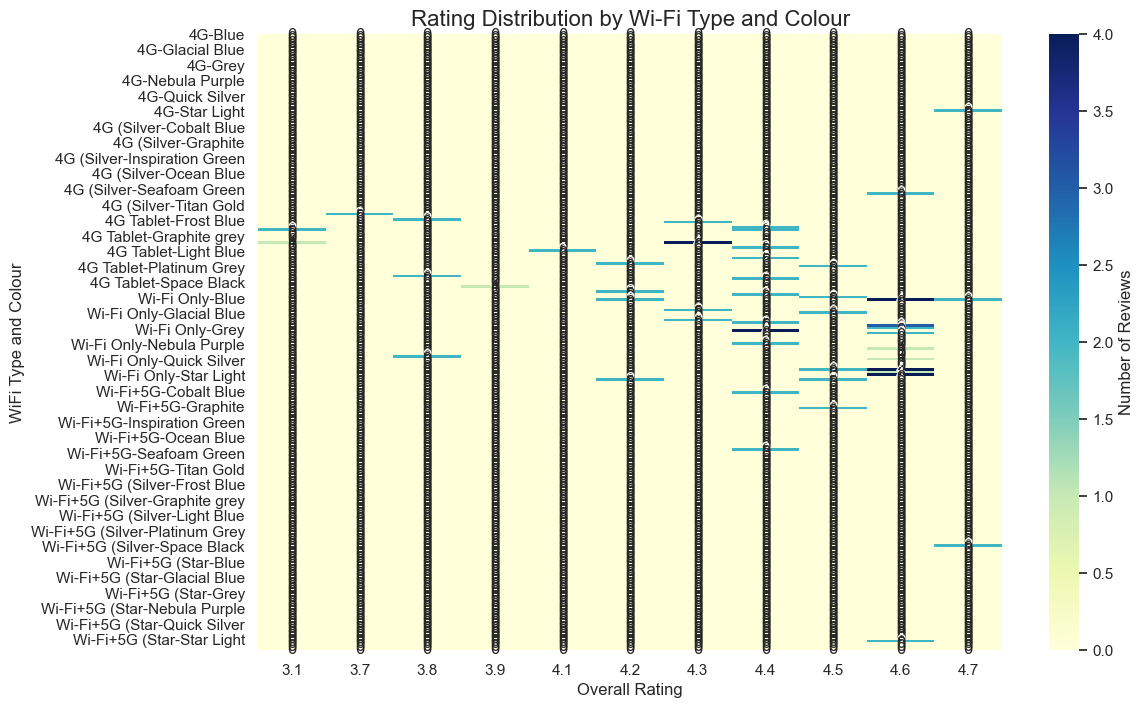

In [137]:
rating_distribution = df.groupby(['WiFi_Type', 'Colour', 'Overall_Rating']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(rating_distribution, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Number of Reviews'})
plt.title("Rating Distribution by Wi-Fi Type and Colour", fontsize=16)
plt.xlabel('Overall Rating', fontsize=12)
plt.ylabel('WiFi Type and Colour', fontsize=12)

**Average Rating vs. Sentiment Score and No_of_Ratings**

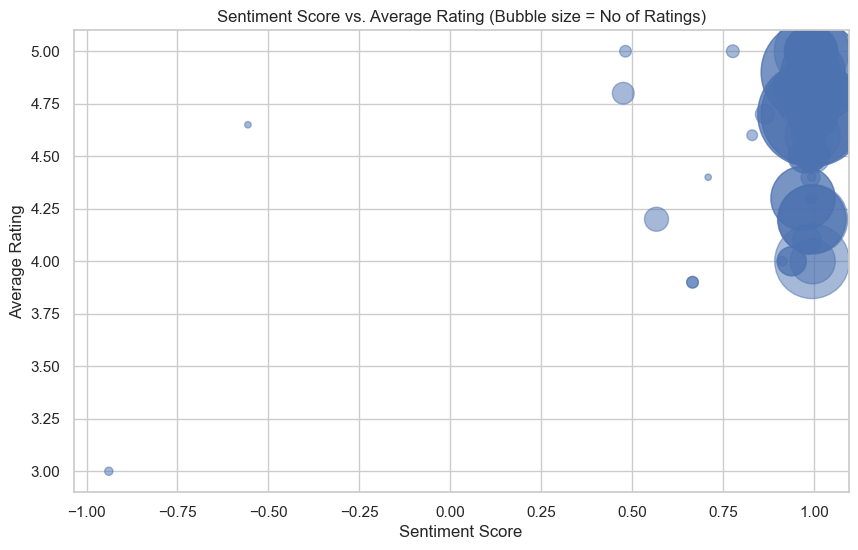

In [139]:
plt.figure(figsize=(10,6))
plt.scatter(df['Sentiment_Score'], df['Average_Rating'], s=df['No_of_Ratings']/10, alpha=0.5)
plt.title("Sentiment Score vs. Average Rating (Bubble size = No of Ratings)")
plt.xlabel("Sentiment Score")
plt.ylabel("Average Rating")
plt.show()

**Brand, RAM, Storage, and Screen Size vs. Price**

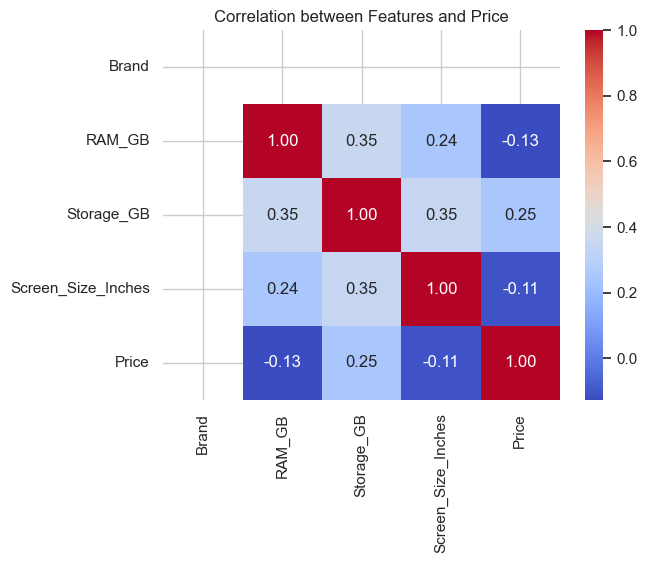

In [141]:
corr = df[['Brand', 'RAM_GB', 'Storage_GB', 'Screen_Size_Inches', 'Price']].apply(pd.to_numeric, errors='coerce').corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation between Features and Price")
plt.show()

**No_of_Ratings, No_of_Reviews, and Sentiment Score**

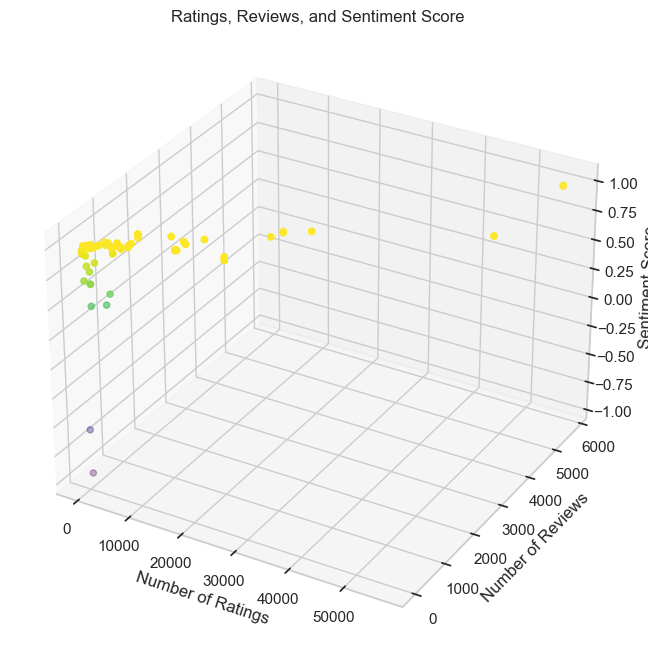

In [143]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['No_of_Ratings'], df['No_of_Reviews'], df['Sentiment_Score'], c=df['Sentiment_Score'], cmap='viridis', marker='o')
ax.set_xlabel('Number of Ratings')
ax.set_ylabel('Number of Reviews')
ax.set_zlabel('Sentiment Score')
plt.title('Ratings, Reviews, and Sentiment Score')
plt.show()

**WiFi_Type, Storage, and Screen Size vs. Popularity Score**

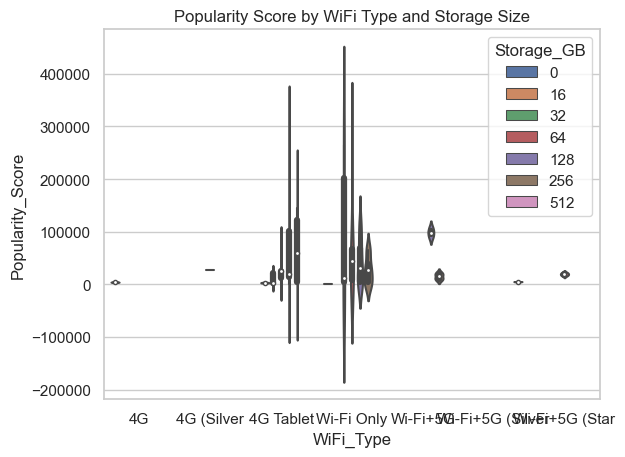

In [145]:
sns.violinplot(x="WiFi_Type", y="Popularity_Score", hue="Storage_GB", data=df)
plt.title("Popularity Score by WiFi Type and Storage Size")
plt.show()

**Sentiment Score vs. Rating Density and Review Sentiment**

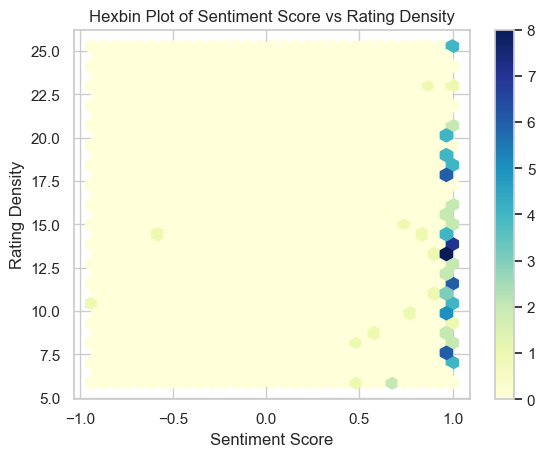

In [147]:
plt.hexbin(df['Sentiment_Score'], df['Rating_Density'], gridsize=30, cmap='YlGnBu')
plt.colorbar()
plt.title('Hexbin Plot of Sentiment Score vs Rating Density')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating Density')
plt.show()


**Average Rating and Sentiment Score by Product Color and WiFi Type**

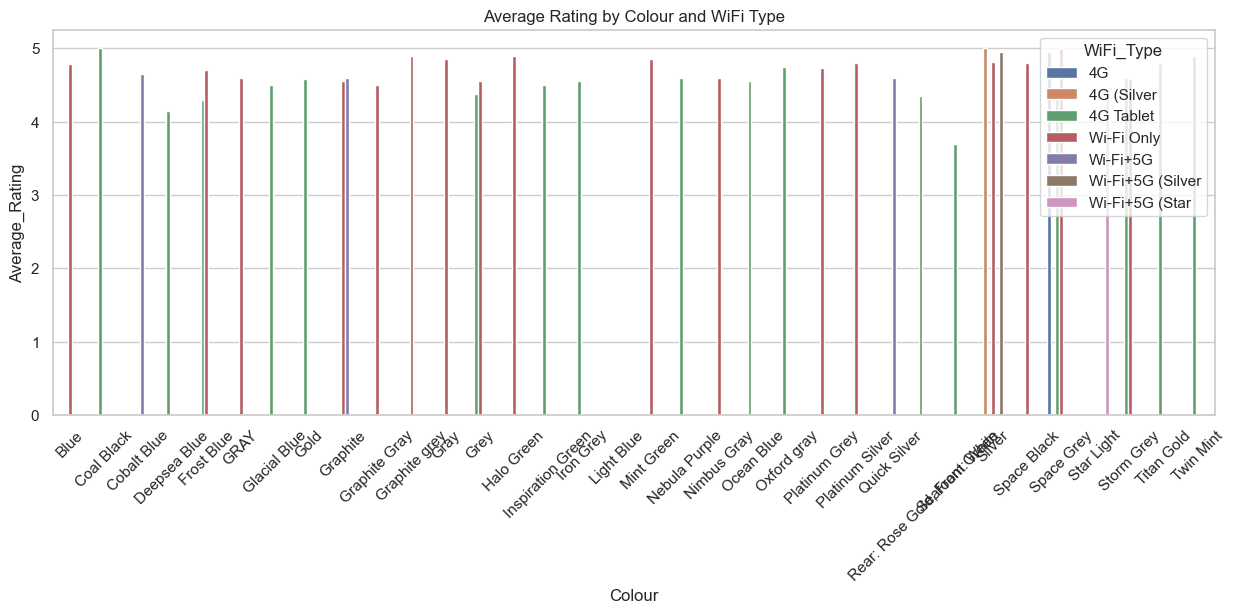

In [286]:
plt.figure(figsize=(15, 5))
avg_rating_sentiment = df.groupby(['Colour', 'WiFi_Type'])[['Average_Rating', 'Sentiment_Score']].mean().reset_index()
sns.barplot(x='Colour', y='Average_Rating', hue='WiFi_Type', data=avg_rating_sentiment)
plt.title("Average Rating by Colour and WiFi Type")
plt.xticks(rotation=45)
plt.show()

**Brand, Storage, and Screen Size vs. Rating Group**

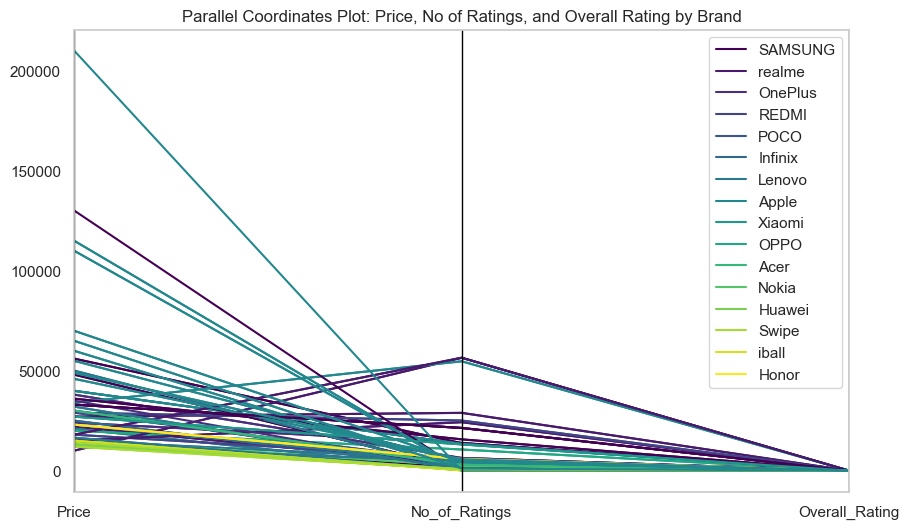

In [151]:
from pandas.plotting import parallel_coordinates

df['Brand'] = df['Brand'].astype('category')

plt.figure(figsize=(10, 6))
parallel_coordinates(df[['Price', 'No_of_Ratings', 'Overall_Rating', 'Brand']], 'Brand', colormap='viridis')
plt.title('Parallel Coordinates Plot: Price, No of Ratings, and Overall Rating by Brand')
plt.show()

### Topic Modeling on Review Texts (Using LDA)

In [153]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

reviews = df['Review_Texts']

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews)

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(X)

num_words = 10
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-num_words:]])


Topic 0:
['value', 'tablet', 'price', 'money', 'quality', 'tab', 'best', 'nice', 'product', 'good']
Topic 1:
['quality', 'value', 'best', 'money', 'nice', 'battery', 'tab', 'display', 'product', 'good']
Topic 2:
['tablet', 'screen', 'tab', 'realme', 'product', 'best', 'performance', 'display', 'battery', 'good']
Topic 3:
['smooth', 'device', 'great', 'like', 'performance', 'tablet', 'best', 'battery', 'good', 'product']
Topic 4:
['best', 'smooth', 'product', 'price', 'display', 'tablet', 'battery', 'performance', 'tab', 'good']


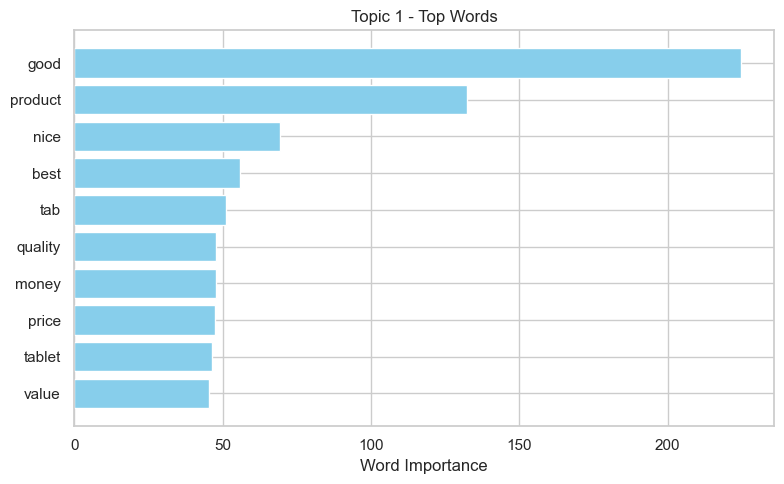

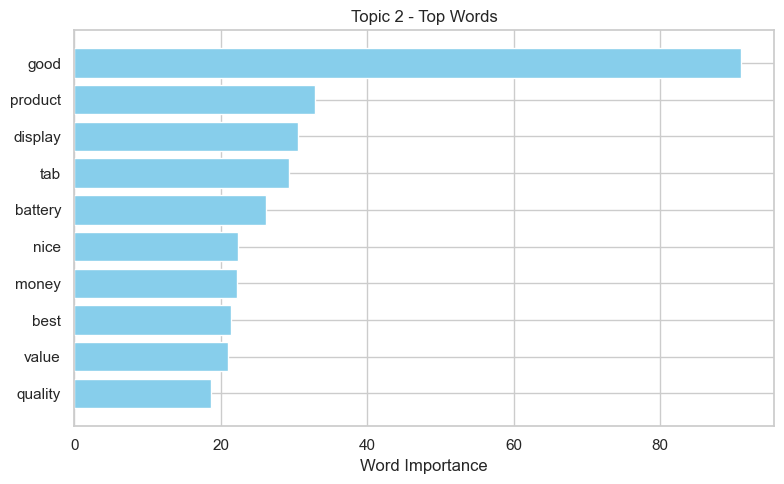

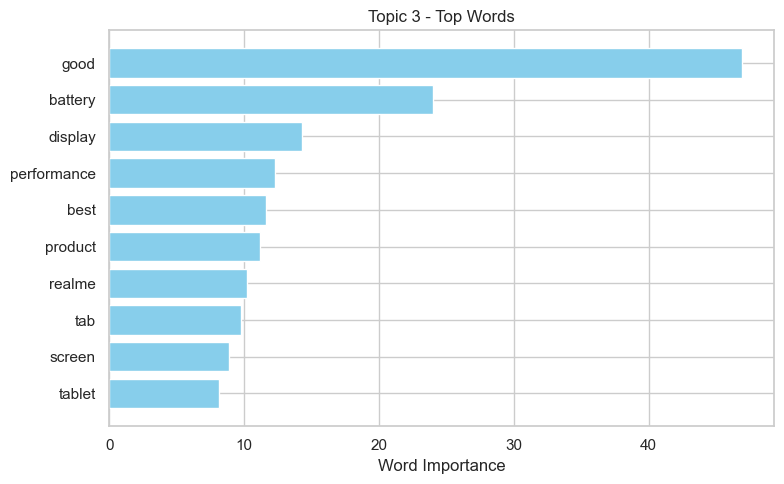

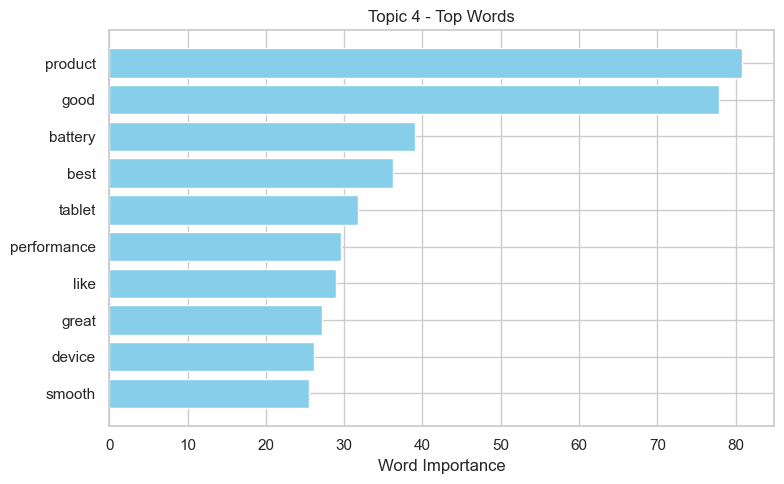

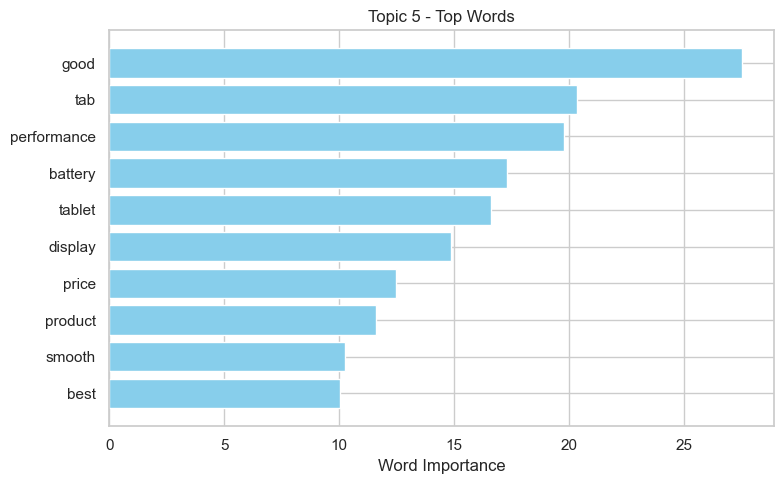

In [154]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(reviews)

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(X)

num_words = 10
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[-num_words:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    top_weights = topic[top_indices]

    plt.figure(figsize=(8, 5))
    plt.barh(top_words, top_weights, color='skyblue')
    plt.gca().invert_yaxis()  # Highest weight on top
    plt.title(f"Topic {topic_idx + 1} - Top Words")
    plt.xlabel("Word Importance")
    plt.tight_layout()
    plt.show()

### Clustering Products Using KMeans

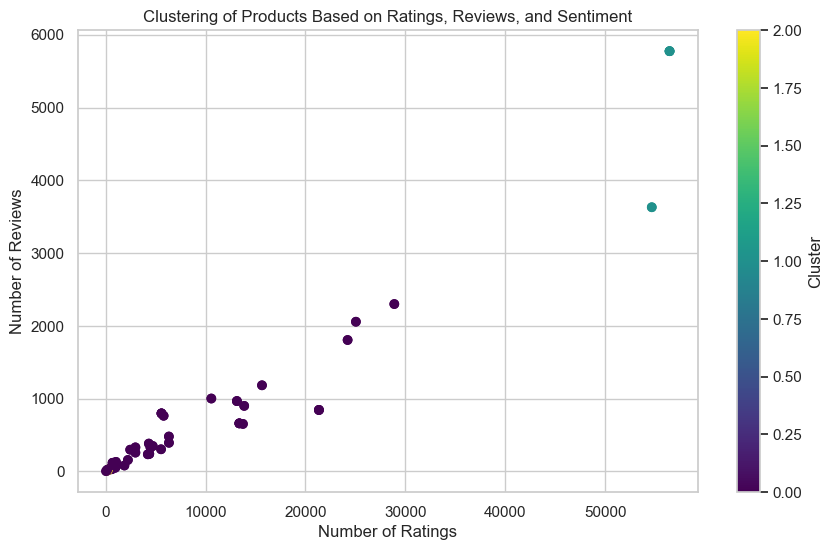

In [156]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_clustering = df[['No_of_Ratings', 'No_of_Reviews', 'Sentiment_Score']].dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clustering)

kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(df_clustering['No_of_Ratings'], df_clustering['No_of_Reviews'], c=df_clustering['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering of Products Based on Ratings, Reviews, and Sentiment')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Reviews')
plt.colorbar(label='Cluster')
plt.show()

In [157]:
df.head()

,Unique_ID,Product_URL,Product_Title,Brand,Model,Specifications,WiFi_Type,Colour,No_of_Ratings,No_of_Reviews,...,Text_Char_Count,Rating_Density,Unique_Word_Count,Sentiment_Score,Review_Sentiment,All_Reviews,RAM_GB,Storage_GB,Screen_Size_Inches,Popularity_Score
0,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,SAMSUNG,Galaxy Tab A9+,8 GB RAM 128 GB ROM 11.0 inch,Wi-Fi+5G,Graphite,21349.0,845.0,...,1152,25.265089,122,0.9982,Positive,very good just wow brilliant perfect product h...,8,128,11.00,104610.1
1,39,https://www.flipkart.com/samsung-galaxy-tab-a9...,SAMSUNG Galaxy Tab A9+ 8 GB RAM 128 GB ROM 11....,SAMSUNG,Galaxy Tab A9+,8 GB RAM 128 GB ROM 11.0 inch,Wi-Fi+5G,Graphite,21349.0,845.0,...,210,25.265089,23,0.9705,Positive,perfect product very good delightful wonderful...,8,128,11.00,91800.7
2,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,realme,Pad 2 Lite,8 GB RAM 128 GB ROM 11.0 inch,4G Tablet,Nebula Purple,2979.0,259.0,...,333,11.501931,42,0.9883,Positive,brilliant worth every penny wonderful worth th...,8,128,11.00,13405.5
3,50,https://www.flipkart.com/realme-pad-2-lite-8-g...,realme Pad 2 Lite 8 GB RAM 128 GB ROM 11.0 inc...,realme,Pad 2 Lite,8 GB RAM 128 GB ROM 11.0 inch,4G Tablet,Nebula Purple,2979.0,259.0,...,352,11.501931,38,0.9908,Positive,perfect product nice product excellent just wo...,8,128,11.00,14001.3
4,30,https://www.flipkart.com/oneplus-pad-go-8-gb-r...,OnePlus Pad Go 8 GB RAM 128 GB ROM 11.35 inch ...,OnePlus,Pad Go,8 GB RAM 128 GB ROM 11.35 inch,4G Tablet,Twin Mint,13869.0,901.0,...,1016,15.392897,125,0.9955,Positive,awesome mindblowing purchase terrific purchase...,8,128,11.35,67958.1


In [158]:
# df.to_csv('Tabs.csv', index=False)